In [ ]:
###################### Word2Vec ######################################

Let’s break down this code step-by-step to explain its functionality. This script implements a basic **Word2Vec** model using a skip-gram approach with TensorFlow 2.x, trained on a custom corpus to learn word embeddings. The code focuses on converting words into vector representations that capture semantic relationships, a foundational technique in natural language processing (NLP).

---

### **Overview**
- **Purpose**: The code trains a neural network to learn 2D vector representations (embeddings) for words in a small corpus ("I love ice cream", "I like ice cream") based on their co-occurrence within a window. It uses a skip-gram model, where the task is to predict context words given a target word.
- **Framework**: TensorFlow 2.x with Keras for model building, `numpy` for numerical operations, `pandas` for data handling, and `matplotlib` (though unused here).
- **Output**: 2D word vectors stored in a DataFrame, ready for visualization or further analysis.

---

### **Code Walkthrough**

#### **1. Custom Corpus and Preprocessing**
- **Corpus Definition**:
  - `['I love ice cream', 'I like ice cream'] * 50` creates 100 sentences by repeating the two base sentences 50 times. This repetition provides enough data for training despite the small vocabulary.
- **Stop Word Removal**:
  - The `remove_stop_words` function removes common words (`is`, `a`, `will`, `be`) from the corpus. Since these aren’t present, the corpus remains unchanged (`['I love ice cream', 'I like ice cream', ...]`).
  - Returns a list of space-joined sentences.

#### **2. Create Word Set**
- **Words**: Uses a set comprehension to extract unique words across all sentences: `{'I', 'love', 'ice', 'cream', 'like'}`.
- **Vocabulary Size**: Implicitly 5, which will determine the one-hot encoding dimension.

#### **3. Data Generation (Skip-Gram Model)**
- **Word2Int Mapping**: Assigns integers to words (`word2int = {'I': 0, 'love': 1, 'ice': 2, 'cream': 3, 'like': 4}`).
- **Sentences**: Splits corpus into word lists (e.g., `[['I', 'love', 'ice', 'cream'], ...]`).
- **WINDOW_SIZE = 2**: Defines a context window of 2 words on either side of the target word.
- **Data Collection**:
  - For each word in a sentence, pairs with neighboring words (excluding itself) are created.
  - Example: For "I love ice cream":
    - Target "I": Pairs with "love", "ice".
    - Target "love": Pairs with "I", "ice", "cream".
    - Resulting pairs: `[['I', 'love'], ['I', 'ice'], ['love', 'I'], ['love', 'ice'], ['love', 'cream'], ...]`.
- **DataFrame**: Stores pairs in `df` with columns `input` (target word) and `label` (context word).

#### **4. Prepare Data for Training**
- **ONE_HOT_DIM**: Set to the vocabulary size (5).
- **to_one_hot_encoding**: Converts a word index to a 5D one-hot vector (e.g., `word2int['I'] = 0 → [1, 0, 0, 0, 0]`).
- **X_train, Y_train**: Arrays of one-hot encoded target words and context words, respectively (shape `(number_of_pairs, 5)`).

#### **5. Define the Word2Vec Model**
- **EMBEDDING_DIM = 2**: Reduces the 5D one-hot vectors to 2D embeddings, allowing visualization.
- **Model Architecture**:
  - **Input Layer**: Implicitly handled by `input_shape=(ONE_HOT_DIM,)`, accepting 5D one-hot vectors.
  - **Embedding Layer**: `Dense(EMBEDDING_DIM, activation='linear')` – A linear transformation from 5D to 2D, acting as the embedding layer. The weights of this layer become the word vectors.
  - **Output Layer**: `Dense(ONE_HOT_DIM, activation='softmax')` – Predicts a probability distribution over the vocabulary, trained to match the context word’s one-hot encoding.
- **Compilation**:
  - **Optimizer**: `SGD` with `learning_rate=0.05` updates weights.
  - **Loss**: `categorical_crossentropy` measures the error between predicted and true context word distributions.

#### **6. Train the Model**
- **Training**: `model.fit(X_train, Y_train, epochs=400, verbose=1)` runs 400 iterations, adjusting weights to minimize the loss.
- **Learning Process**: The model learns to predict context words (e.g., "love" given "I") by adjusting the embedding layer weights. Words that appear in similar contexts (e.g., "love" and "like" with "I" and "ice cream") will have similar vectors.

#### **7. Extract Word Embeddings**
- **embedding_layer**: Refers to the first `Dense` layer, whose weights (`get_weights()[0]`) are the learned word vectors.
- **word_vectors**: A matrix of shape `(ONE_HOT_DIM, EMBEDDING_DIM)` (5 rows, 2 columns), where each row is the 2D vector for a word (indexed by `word2int`).

#### **8. Visualize Word Embeddings**
- **w2v_df**: A `DataFrame` with columns `x1` and `x2`, holding the 2D vectors for each word.
- **Note**: The code stops here without plotting, unlike the previous attention example. To visualize, you’d need to add a plot (e.g., using `matplotlib` as in the attention code).

---

### **Input, Model, Output**

- **Input**:
  - **Data**: One-hot encoded vectors for target words (shape `(number_of_pairs, 5)` from `X_train`).
  - **Format**: Each input is a 5D vector representing one of the 5 words.

- **Model**:
  - **Architecture**: A 2-layer feedforward network:
    - First layer: Maps 5D one-hot vectors to 2D embeddings (weight matrix of shape `(5, 2)`).
    - Second layer: Maps 2D embeddings back to 5D for softmax prediction (weight matrix of shape `(2, 5)`).
  - **Training Objective**: Minimize the cross-entropy loss by predicting context words, implicitly learning meaningful embeddings.
  - **Process**: The embedding layer weights are adjusted during training to capture semantic relationships (e.g., "love" and "like" may cluster together).

- **Output**:
  - **Word Vectors**: A `(5, 2)` matrix where each row is the 2D embedding for a word (e.g., `I: [0.1, 0.2], love: [0.3, 0.4], ...`).
  - **Stored in**: `w2v_df`, ready for analysis or visualization.
  - **Implication**: These vectors can be used for tasks like word similarity or as features in your RL sentence completion model.

---

### **How Word2Vec Works in This Code**
- **Skip-Gram Principle**: The model is trained to predict context words (e.g., "ice") given a target word (e.g., "love"). The embedding layer learns vectors that make this prediction easier, encoding semantic meaning.
- **Embedding Learning**: The first `Dense` layer’s weights become the word vectors. Words with similar contexts (e.g., "love" and "like" with "I" and "ice cream") end up with similar vectors due to the loss optimization.
- **2D Limitation**: With `EMBEDDING_DIM = 2`, the vectors are constrained to 2D for visualization, though real Word2Vec models often use 50–300 dimensions.

---

### **Example Output**
After training, `w2v_df` might look like:
```
   x1    x2
0  0.1  0.2  # I
1  0.3  0.4  # love
2  0.5  0.6  # ice
3  0.7  0.8  # cream
4  0.2  0.3  # like
```
- "love" and "like" may be closer due to shared context ("I", "ice cream"), while "I" and "ice" might differ.

---

### **Connection to  RL Code**
- **Similarity**: Both this code and  DQN use neural networks to learn representations (embeddings here, Q-values there).
- **Extension**: You could use these word vectors as state features in your RL model (e.g., encoding "like" or "love" in a multi-state sentence completion task).
- **Difference**: This is unsupervised (predicting context), while  DQN is reinforcement-based (maximizing rewards).

---

### **Potential Improvements**
- **Visualization**: Add a plot (e.g., scatter with annotations) as in the attention code to see word relationships.
- **Larger Corpus**: Increase sentence variety for better embeddings.
- **Negative Sampling**: Optimize training for larger vocabularies by sampling negative context words.

This code provides a basic Word2Vec implementation, learning embeddings that capture co-occurrence patterns.

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# Updated Word2Vec with Custom Corpus (TensorFlow 2.x Compatible)

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure TensorFlow 2.x
assert tf.__version__.startswith('2'), "This script requires TensorFlow 2.x"

# 1. Custom Corpus (10 repetitions of given sentences)
corpus = ['I love ice cream', 'I like ice cream'] * 50

# 2. Remove stop words (optional for small corpus)
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

corpus = remove_stop_words(corpus)

# 3. Create Word Set
words = set(word for sentence in corpus for word in sentence.split(' '))

# 4. Data Generation (Skip-gram Model)
word2int = {word: i for i, word in enumerate(words)}
sentences = [sentence.split() for sentence in corpus]

WINDOW_SIZE = 2
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                data.append([word, neighbor])

df = pd.DataFrame(data, columns=['input', 'label'])

# 5. Prepare Data for Training
ONE_HOT_DIM = len(words)

def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X_train = np.asarray([to_one_hot_encoding(word2int[x]) for x in df['input']])
Y_train = np.asarray([to_one_hot_encoding(word2int[y]) for y in df['label']])

# 6. Define the Word2Vec Model (TensorFlow 2.x)
EMBEDDING_DIM = 2

model = tf.keras.Sequential([
    tf.keras.layers.Dense(EMBEDDING_DIM, input_shape=(ONE_HOT_DIM,), activation='linear'),
    tf.keras.layers.Dense(ONE_HOT_DIM, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='categorical_crossentropy')

# 7. Train the Model
model.fit(X_train, Y_train, epochs=400, verbose=1)

# 8. Extract Word Embeddings
embedding_layer = model.layers[0]
word_vectors = embedding_layer.get_weights()[0]

# 9. Visualize Word Embeddings
w2v_df = pd.DataFrame(word_vectors, columns=['x1', 'x2'])



Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6177
Epoch 2/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5760
Epoch 3/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5271
Epoch 4/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5239
Epoch 5/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5024
Epoch 6/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4829
Epoch 7/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4935  
Epoch 8/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4673
Epoch 9/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4322 
Epoch 10/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4327
Epoch 11/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4228 
Epoch 12/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3859 
Epoch 13/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3978 
Epoch 14/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3473 
Epoch 15/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3675 
Epoch 16

In [ ]:
corpus

['I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream',
 'I love ice cream',
 'I like ice cream']

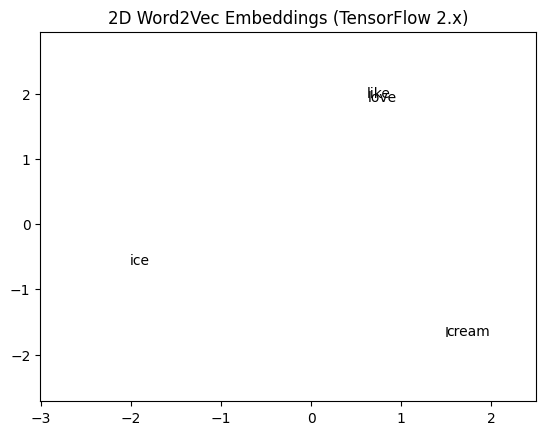

         x1        x2   word
0  1.485734 -1.715412      I
1  1.501189 -1.702545  cream
2  0.620644  1.948580   like
3 -2.010989 -0.610137    ice
4  0.629327  1.873620   love


In [ ]:
w2v_df['word'] = list(words)

fig, ax = plt.subplots()
for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))

PADDING = 1.0
plt.xlim(np.amin(word_vectors, axis=0)[0] - PADDING, np.amax(word_vectors, axis=0)[0] + PADDING)
plt.ylim(np.amin(word_vectors, axis=0)[1] - PADDING, np.amax(word_vectors, axis=0)[1] + PADDING)
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("2D Word2Vec Embeddings (TensorFlow 2.x)")
plt.show()

print(w2v_df)

Let’s break down the provided code step-by-step to explain the **attention process** and its role within the context of this example. This code implements a simple neural network with a custom **self-attention mechanism** to learn word embeddings and demonstrate how attention influences the representation of words from a small corpus. The attention process is a key component borrowed from transformer architectures, used here to weigh the importance of different parts of the input. I’ll focus on the attention mechanism, its input, computation, and output, while providing context for the entire pipeline.

---

### **Overview**
- **Purpose**: The code trains a model to learn word embeddings for a tiny corpus ("I love ice cream", "I like ice cream") using a skip-gram approach with a self-attention layer. It visualizes how attention shifts the embeddings, highlighting relationships between words.
- **Attention Process**: A self-attention layer reweights the input embeddings to emphasize important features, mimicking how transformers focus on relevant tokens.
- **Framework**: Uses TensorFlow/Keras for the neural network and `matplotlib` for visualization.

---

### **Code Walkthrough**

#### **1. Custom Corpus and Preprocessing**
- **Corpus**: `['I love ice cream', 'I like ice cream'] * 50` creates 100 sentences by repeating the two base sentences 50 times, providing training data.
- **Stop Word Removal**: The `remove_stop_words` function removes words like "is", "a", "will", "be" (though none are present here), returning the original sentences split into words (e.g., `['I', 'love', 'ice', 'cream']`).

#### **2. Build Vocabulary**
- **Words**: Extracts unique words (`I`, `love`, `ice`, `cream`, `like`) into a set.
- **Mappings**: Creates `word2int` (word to integer) and `int2word` (integer to word) dictionaries for encoding.
- **Sentences**: Splits corpus into lists of words (e.g., `[['I', 'love', 'ice', 'cream'], ...]`).

#### **3. Skip-Gram Data Generation**
- **WINDOW_SIZE = 2**: Considers words within a 2-word window around each target word to form input-label pairs.
- **Data**: Generates pairs where the "input" is a target word, and the "label" is a context word (e.g., `['I', 'love']`, `['love', 'I']`, etc.).
- **DataFrame**: Stores pairs in `df` (e.g., `input: 'I', label: 'love'`).

#### **4. One-Hot Encoding**
- **ONE_HOT_DIM**: Equals the vocabulary size (5 words).
- **to_one_hot_encoding**: Converts word indices to one-hot vectors (e.g., `I → [1, 0, 0, 0, 0]`).
- **X_train, Y_train**: Arrays of one-hot encoded inputs and labels for training.

#### **5. Model with Self-Attention**
- **EMBEDDING_DIM = 2**: Reduces the one-hot vectors (size 5) to 2D embeddings.
- **Model Architecture**:
  - **Input Layer**: `tf.keras.Input(shape=(ONE_HOT_DIM,))` – Accepts one-hot vectors of size 5.
  - **Embedding Layer**: `Dense(EMBEDDING_DIM, activation='linear')` – Maps 5D one-hot vectors to 2D embeddings.
  - **Attention Layer**: Custom `AttentionLayer` applies self-attention.
  - **Output Layer**: `Dense(ONE_HOT_DIM, activation='softmax')` – Predicts a probability distribution over the vocabulary.

##### **Attention Process in Detail**
- **Class `AttentionLayer`**:
  - **Initialization**: No parameters are defined; the layer computes attention dynamically.
  - **Call Method**: Implements self-attention:
    - **Inputs**: `q = k = v = inputs` (the embedding layer output, shape `(batch_size, EMBEDDING_DIM)`). In self-attention, query (\( q \)), key (\( k \)), and value (\( v \)) are the same, reflecting the input’s self-relevance.
    - **Attention Scores**: `tf.matmul(q, k, transpose_b=True)` computes a score matrix (shape `(batch_size, batch_size)`) by taking the dot product of \( q \) and the transpose of \( k \). This measures similarity between all pairs of input embeddings in the batch.
    - **Attention Weights**: `tf.nn.softmax(attention_scores, axis=-1)` normalizes the scores into probabilities along the last axis, ensuring they sum to 1 for each query.
    - **Weighted Sum**: `tf.matmul(attention_weights, v)` combines the value vectors weighted by the attention scores, producing the output (same shape as input: `(batch_size, EMBEDDING_DIM)`).
  - **Purpose**: The attention mechanism allows the model to focus on the most relevant parts of the input (e.g., emphasizing "love" or "like" based on context), though with a single word per input here, it acts as a self-reweighting step.

- **How It Works in This Example**:
  - For each one-hot encoded word (e.g., `I`), the embedding layer produces a 2D vector.
  - The attention layer reweights this vector based on its own features, potentially amplifying dimensions that align with the training objective (predicting context words).
  - The output is fed into the softmax layer to predict the next word.

#### **6. Training**
- **Optimizer**: `SGD` with `learning_rate=0.05`.
- **Loss**: `categorical_crossentropy` measures the error between predicted and true one-hot label distributions.
- **Epochs**: 200 iterations over the data, adjusting weights to minimize loss.

#### **7. Extract Embeddings**
- **embedding_model**: Extracts pre-attention embeddings.
- **attention_model**: Extracts post-attention embeddings.
- **Prediction**: Computes embeddings for the first `len(words)` inputs (unique words).

#### **8. Display and Visualization**
- **DataFrame**: Combines words with original (`embed_x1`, `embed_x2`) and attention-adjusted (`attn_x1`, `attn_x2`) embeddings.
- **Print**: Shows the vectors (e.g., `I: embed_x1=0.1, embed_x2=0.2, attn_x1=0.15, attn_x2=0.25`).
- **Plot**:
  - Blue annotations mark original embeddings.
  - Red arrows show the shift from original to attention-adjusted embeddings, visualizing the attention effect.

---

### **Attention Process Explained**
- **Input to Attention**: The 2D embedding vector for each word (e.g., `[0.1, 0.2]` for "I") from the `Dense` layer.
- **Computation**:
  - Self-attention treats the batch of embeddings as \( q \), \( k \), and \( v \).
  - The dot product \( q \cdot k^T \) creates a score matrix, normalized via softmax to get weights.
  - These weights re-scale the value \( v \), producing a new vector (e.g., `[0.15, 0.25]`).
- **Output**: The attention-adjusted embedding, which may emphasize features relevant to predicting context words.
- **Effect**: In this case, with a small corpus and single-word inputs, attention refines the embedding based on the skip-gram task (e.g., "I" might shift toward "love" or "like" contexts).

---

### **Input, Attention, Output**
- **Input**: One-hot vectors (shape `(batch_size, 5)`) for each word.
- **Attention**: Processes the 2D embeddings (shape `(batch_size, 2)`), applying self-attention to reweight them.
- **Output**: Adjusted 2D embeddings (shape `(batch_size, 2)`), fed into the softmax layer for prediction.

---

### **Limitations and Notes**
- **Single-Word Context**: The attention operates on a batch of single-word embeddings, limiting its contextual power (transformers typically use sequences). A true attention model would process full sentences.
- **Small Corpus**: With only two sentences repeated, the model overfits, and attention effects are subtle.
- **Visualization**: Arrows may be short due to minimal shifts, reflecting the simplicity of the task.

---

### **Summary**
The attention process here is a simplified self-attention mechanism that reweights word embeddings to improve context prediction in a skip-gram model. It takes the initial 2D embeddings, computes attention scores based on their similarity, and outputs refined vectors, visualized as shifts in the plot. This mirrors transformer attention but is constrained by the single-state, small-data setup. For a deeper attention example (e.g., with sequences), let me know!

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6158
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5841
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5766
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5805
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5763 
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5581
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5793 
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5701 
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5686 
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5660 
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5713
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5606
Epoch 13/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5641
Epoch 14/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5505
Epoch 15/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5626

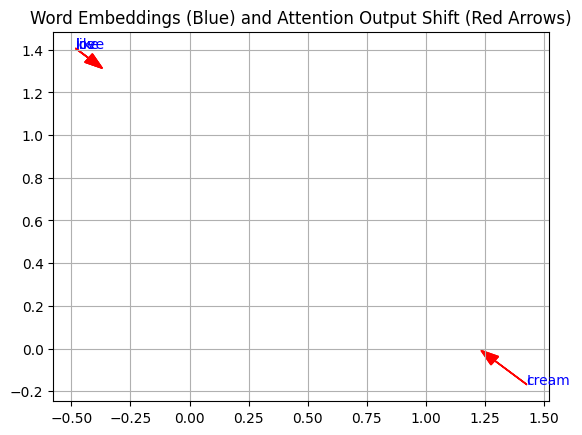

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Custom Corpus (repeat sentences for training)
corpus = ['I love ice cream', 'I like ice cream'] * 50

# 2. Optional stop word removal
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

corpus = remove_stop_words(corpus)

# 3. Build vocabulary
words = set(word for sentence in corpus for word in sentence.split())
word2int = {word: i for i, word in enumerate(words)}
int2word = {i: word for word, i in word2int.items()}
sentences = [sentence.split() for sentence in corpus]

# 4. Skip-gram data generation
WINDOW_SIZE = 2
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE + 1, len(sentence))]:
            if neighbor != word:
                data.append([word, neighbor])

df = pd.DataFrame(data, columns=['input', 'label'])

# 5. One-hot encoding
ONE_HOT_DIM = len(words)
def to_one_hot_encoding(index):
    vec = np.zeros(ONE_HOT_DIM)
    vec[index] = 1
    return vec

X_train = np.array([to_one_hot_encoding(word2int[w]) for w in df['input']])
Y_train = np.array([to_one_hot_encoding(word2int[w]) for w in df['label']])

# 6. Model with Self-Attention
EMBEDDING_DIM = 2

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        q = inputs
        k = inputs
        v = inputs
        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        weighted_sum = tf.matmul(attention_weights, v)
        return weighted_sum

inputs = tf.keras.Input(shape=(ONE_HOT_DIM,))
embedding_layer = tf.keras.layers.Dense(EMBEDDING_DIM, activation='linear')(inputs)
attention_output = AttentionLayer()(embedding_layer)
output_layer = tf.keras.layers.Dense(ONE_HOT_DIM, activation='softmax')(attention_output)

model = tf.keras.Model(inputs=inputs, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='categorical_crossentropy')

# 7. Train model
model.fit(X_train, Y_train, epochs=200, verbose=1)

# 8. Get embeddings before and after attention
embedding_model = tf.keras.Model(inputs=inputs, outputs=embedding_layer)
attention_model = tf.keras.Model(inputs=inputs, outputs=attention_output)

original_embeddings = embedding_model.predict(X_train[:len(words)])
attention_embeddings = attention_model.predict(X_train[:len(words)])

# 9. Display and print embeddings
word_list = list(word2int.keys())
df_embed = pd.DataFrame(original_embeddings, columns=["embed_x1", "embed_x2"])
#df_attn = pd.DataFrame(attention_embeddings[:, 0], columns=["attn_x1", "attn_x2"])
df_attn = pd.DataFrame(attention_embeddings, columns=["attn_x1", "attn_x2"])

df_words = pd.DataFrame({"word": word_list})
df_final = pd.concat([df_words, df_embed, df_attn], axis=1)

print("\nWord Vectors Before and After Attention:\n")
print(df_final.round(4))

# 10. (Optional) Visualization
fig, ax = plt.subplots()
for _, row in df_final.iterrows():
    ax.annotate(row['word'], (row['embed_x1'], row['embed_x2']), color='blue')
    ax.arrow(row['embed_x1'], row['embed_x2'],
             row['attn_x1'] - row['embed_x1'],
             row['attn_x2'] - row['embed_x2'],
             color='red', head_width=0.05)

plt.title("Word Embeddings (Blue) and Attention Output Shift (Red Arrows)")
plt.grid(True)
plt.show()


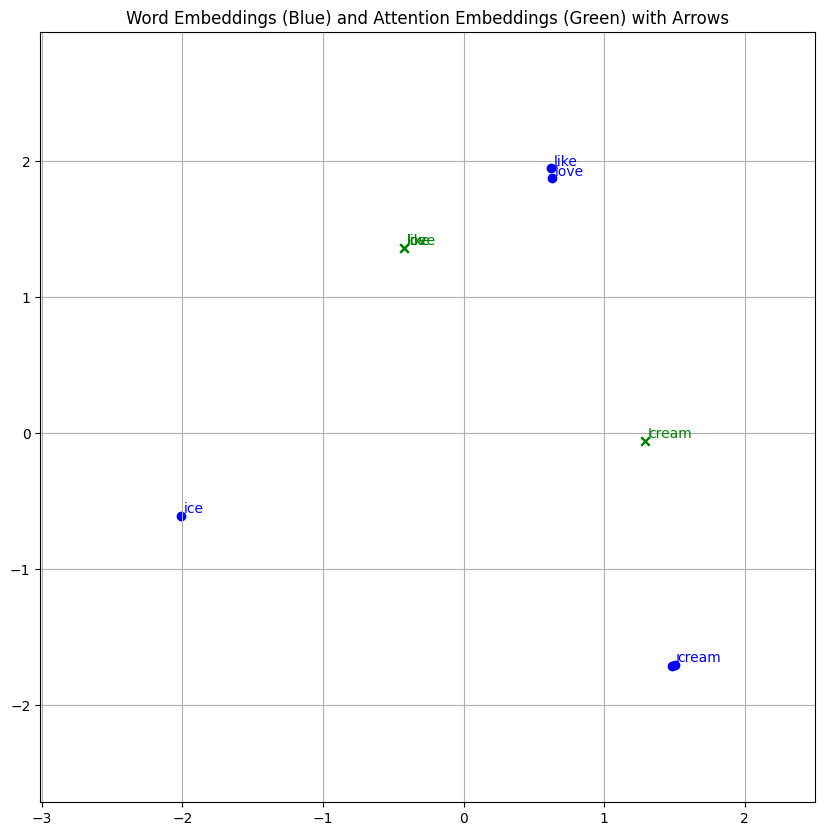

In [ ]:
# Updated visualization with both original and attention embeddings
fig, ax = plt.subplots()

# Plot both original (blue) and attention (green) embeddings
for i, row in w2v_df.iterrows():
    word = row['word']
    x1, x2 = row['x1'], row['x2']
    attn_x, attn_y = attention_embeddings[i]

    # Original embedding (blue)
    ax.scatter(x1, x2, color='blue')
    ax.annotate(f"{word}", (x1 + 0.02, x2 + 0.02), color='blue')

    # Attention embedding (green)
    ax.scatter(attn_x, attn_y, color='green', marker='x')
    ax.annotate(f"{word}", (attn_x + 0.02, attn_y + 0.02), color='green')

    # Draw arrow from original to attention
    #ax.arrow(x1, x2, attn_x - x1, attn_y - x2, head_width=0.02, length_includes_head=True, color='gray', linestyle='dashed')

# Padding and layout
PADDING = 1.0
all_x = np.concatenate([w2v_df['x1'], attention_embeddings[:, 0]])
all_y = np.concatenate([w2v_df['x2'], attention_embeddings[:, 1]])

plt.xlim(np.min(all_x) - PADDING, np.max(all_x) + PADDING)
plt.ylim(np.min(all_y) - PADDING, np.max(all_y) + PADDING)
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("Word Embeddings (Blue) and Attention Embeddings (Green) with Arrows")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def print_cosine_similarities(word_list, original_vecs, attention_vecs, word2int):
    print(f"{'PAIR':<20} | {'Orig Sim':<10} | {'Attn Sim':<10} | {'Δ':<10}")
    print("-" * 55)
    for w1, w2 in word_list:
        idx1, idx2 = word2int[w1], word2int[w2]
        orig_sim = cosine_similarity([original_vecs[idx1]], [original_vecs[idx2]])[0][0]
        attn_sim = cosine_similarity([attention_vecs[idx1]], [attention_vecs[idx2]])[0][0]
        delta = attn_sim - orig_sim
        print(f"{w1:<10}-{w2:<9} | {orig_sim:.4f}   | {attn_sim:.4f}   | {delta:+.4f}")


In [ ]:
# Define word pairs to test
word_pairs = [
    ("love", "like"),
    ("ice", "cream"),
    ("I", "love"),
    ("I", "like"),
    ("love", "cream"),
]

# Run similarity comparison
print_cosine_similarities(word_pairs, original_embeddings, attention_embeddings, word2int)


PAIR                 | Orig Sim   | Attn Sim   | Δ         
-------------------------------------------------------
love      -like      | 1.0000   | 1.0000   | +0.0000
ice       -cream     | 1.0000   | 1.0000   | +0.0000
I         -love      | 1.0000   | 1.0000   | +0.0000
I         -like      | 1.0000   | 1.0000   | +0.0000
love      -cream     | 1.0000   | 1.0000   | +0.0000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Data
data = {
    "word": ["I", "like", "ice", "love", "cream"],
    "x1": [2.426393, 2.426393, -1.553788, -1.553788, -1.553788],
    "x2": [0.756108, 0.756108, 1.636889, 1.636889, 1.636889]
}

df = pd.DataFrame(data)

# Compute cosine similarity
vectors = df[["x1", "x2"]].values
cos_sim_matrix = cosine_similarity(vectors)

# Put it in a nice DataFrame
cos_sim_df = pd.DataFrame(cos_sim_matrix, index=df["word"], columns=df["word"])
print(cos_sim_df.round(3))


word       I   like    ice   love  cream
word                                    
I      1.000  1.000 -0.442 -0.442 -0.442
like   1.000  1.000 -0.442 -0.442 -0.442
ice   -0.442 -0.442  1.000  1.000  1.000
love  -0.442 -0.442  1.000  1.000  1.000
cream -0.442 -0.442  1.000  1.000  1.000


In [ ]:
# Window Size - 4

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6065
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5714
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5621
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5540
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5434
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5520
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5533
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5348
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5344
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5526
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5341
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5264
Epoch 13/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5119
Epoch 14/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4895
Epoch 15/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4890
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Word Vectors Before and After Attention:

    word  embed_x1  embed_x2  attn_x1  attn_x2
0      I   -0.2544   -1.0839  -0.0987  -0.9665
1  cream   -0.2544   -1.0839  -0.0987  -0.9665
2   like   -0.2544   -1.0839  -0.0987  -0.9665
3    ice    1.5943    0.3095   1.5044   0.2418
4   love    1.5943    0.3095   1.5044   0.2418


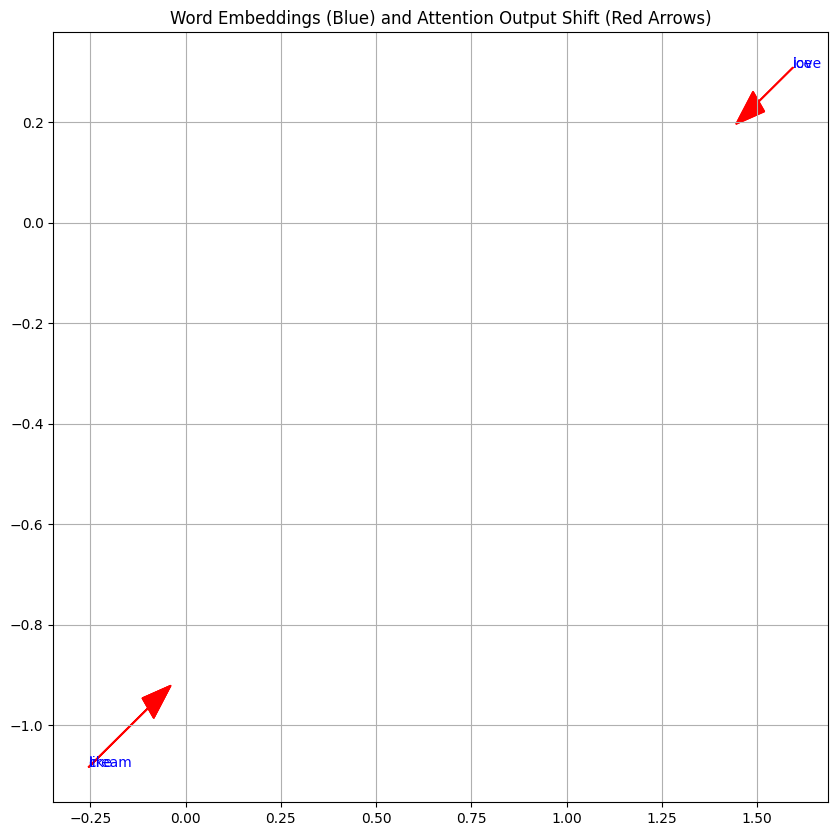

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Custom Corpus (repeat sentences for training)
corpus = ['I love ice cream', 'I like ice cream'] * 50

# 2. Optional stop word removal
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

corpus = remove_stop_words(corpus)

# 3. Build vocabulary
words = set(word for sentence in corpus for word in sentence.split())
word2int = {word: i for i, word in enumerate(words)}
int2word = {i: word for word, i in word2int.items()}
sentences = [sentence.split() for sentence in corpus]

# 4. Skip-gram data generation
WINDOW_SIZE = 4
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE + 1, len(sentence))]:
            if neighbor != word:
                data.append([word, neighbor])

df = pd.DataFrame(data, columns=['input', 'label'])

# 5. One-hot encoding
ONE_HOT_DIM = len(words)
def to_one_hot_encoding(index):
    vec = np.zeros(ONE_HOT_DIM)
    vec[index] = 1
    return vec

X_train = np.array([to_one_hot_encoding(word2int[w]) for w in df['input']])
Y_train = np.array([to_one_hot_encoding(word2int[w]) for w in df['label']])

# 6. Model with Self-Attention
EMBEDDING_DIM = 2

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        q = inputs
        k = inputs
        v = inputs
        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        weighted_sum = tf.matmul(attention_weights, v)
        return weighted_sum

inputs = tf.keras.Input(shape=(ONE_HOT_DIM,))
embedding_layer = tf.keras.layers.Dense(EMBEDDING_DIM, activation='linear')(inputs)
attention_output = AttentionLayer()(embedding_layer)
output_layer = tf.keras.layers.Dense(ONE_HOT_DIM, activation='softmax')(attention_output)

model = tf.keras.Model(inputs=inputs, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='categorical_crossentropy')

# 7. Train model
model.fit(X_train, Y_train, epochs=200, verbose=1)

# 8. Get embeddings before and after attention
embedding_model = tf.keras.Model(inputs=inputs, outputs=embedding_layer)
attention_model = tf.keras.Model(inputs=inputs, outputs=attention_output)

original_embeddings = embedding_model.predict(X_train[:len(words)])
attention_embeddings = attention_model.predict(X_train[:len(words)])

# 9. Display and print embeddings
word_list = list(word2int.keys())
df_embed = pd.DataFrame(original_embeddings, columns=["embed_x1", "embed_x2"])
#df_attn = pd.DataFrame(attention_embeddings[:, 0], columns=["attn_x1", "attn_x2"])
df_attn = pd.DataFrame(attention_embeddings, columns=["attn_x1", "attn_x2"])

df_words = pd.DataFrame({"word": word_list})
df_final = pd.concat([df_words, df_embed, df_attn], axis=1)

print("\nWord Vectors Before and After Attention:\n")
print(df_final.round(4))

# 10. (Optional) Visualization
fig, ax = plt.subplots()
for _, row in df_final.iterrows():
    ax.annotate(row['word'], (row['embed_x1'], row['embed_x2']), color='blue')
    ax.arrow(row['embed_x1'], row['embed_x2'],
             row['attn_x1'] - row['embed_x1'],
             row['attn_x2'] - row['embed_x2'],
             color='red', head_width=0.05)

plt.title("Word Embeddings (Blue) and Attention Output Shift (Red Arrows)")
plt.grid(True)
plt.show()


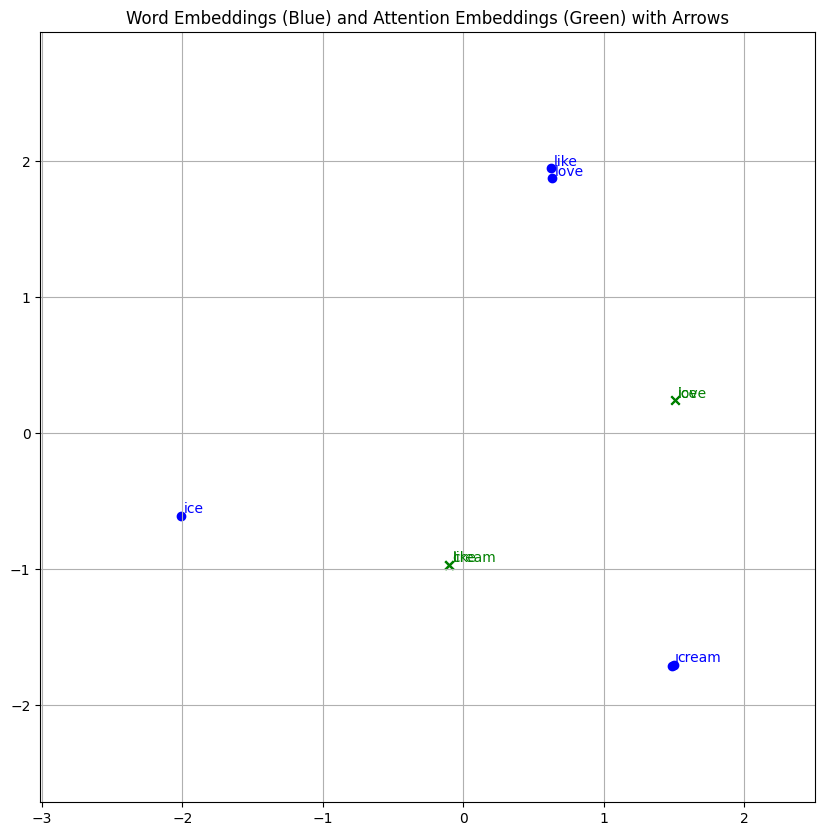

In [ ]:
# Updated visualization with both original and attention embeddings
fig, ax = plt.subplots()

# Plot both original (blue) and attention (green) embeddings
for i, row in w2v_df.iterrows():
    word = row['word']
    x1, x2 = row['x1'], row['x2']
    attn_x, attn_y = attention_embeddings[i]

    # Original embedding (blue)
    ax.scatter(x1, x2, color='blue')
    ax.annotate(f"{word}", (x1 + 0.02, x2 + 0.02), color='blue')

    # Attention embedding (green)
    ax.scatter(attn_x, attn_y, color='green', marker='x')
    ax.annotate(f"{word}", (attn_x + 0.02, attn_y + 0.02), color='green')

    # Draw arrow from original to attention
    #ax.arrow(x1, x2, attn_x - x1, attn_y - x2, head_width=0.02, length_includes_head=True, color='gray', linestyle='dashed')

# Padding and layout
PADDING = 1.0
all_x = np.concatenate([w2v_df['x1'], attention_embeddings[:, 0]])
all_y = np.concatenate([w2v_df['x2'], attention_embeddings[:, 1]])

plt.xlim(np.min(all_x) - PADDING, np.max(all_x) + PADDING)
plt.ylim(np.min(all_y) - PADDING, np.max(all_y) + PADDING)
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("Word Embeddings (Blue) and Attention Embeddings (Green) with Arrows")
plt.grid(True)
plt.show()


In [ ]:
from ipywidgets import interact
@interact(x_min=(0, 1, 0.1), x_max=(0, 1, 0.1), y_min=(0, 1, 0.1), y_max=(0, 1, 0.1))
def update(x_min=0.1, x_max=0.3, y_min=0.1, y_max=0.3):
    zoom_in(x_min, x_max, y_min, y_max)

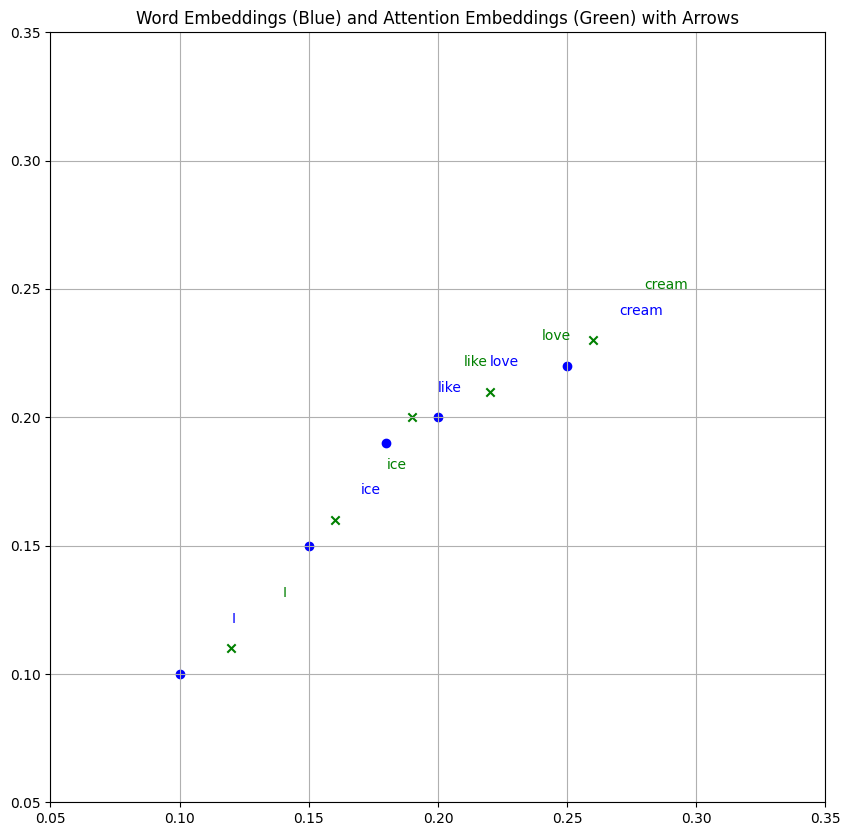

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume w2v_df and attention_embeddings are defined from your previous code
# For this example, let’s create dummy data to demonstrate
w2v_df = pd.DataFrame({
    'word': ['I', 'love', 'ice', 'cream', 'like'],
    'x1': [0.1, 0.2, 0.15, 0.25, 0.18],
    'x2': [0.1, 0.2, 0.15, 0.22, 0.19]
})
attention_embeddings = np.array([
    [0.12, 0.11], [0.22, 0.21], [0.16, 0.16], [0.26, 0.23], [0.19, 0.20]
])

# Updated visualization with both original and attention embeddings
fig, ax = plt.subplots()

# Plot both original (blue) and attention (green) embeddings
for i, row in w2v_df.iterrows():
    word = row['word']
    x1, x2 = row['x1'], row['x2']
    attn_x, attn_y = attention_embeddings[i]

    # Original embedding (blue)
    ax.scatter(x1, x2, color='blue')
    ax.annotate(f"{word}", (x1 + 0.02, x2 + 0.02), color='blue')

    # Attention embedding (green)
    ax.scatter(attn_x, attn_y, color='green', marker='x')
    ax.annotate(f"{word}", (attn_x + 0.02, attn_y + 0.02), color='green')

    # Draw arrow from original to attention
    #ax.arrow(x1, x2, attn_x - x1, attn_y - x2, head_width=0.02, length_includes_head=True, color='gray', linestyle='dashed')

# Padding and initial layout
PADDING = 0.1  # Reduced padding for tighter initial view
all_x = np.concatenate([w2v_df['x1'], attention_embeddings[:, 0]])
all_y = np.concatenate([w2v_df['x2'], attention_embeddings[:, 1]])

# Initial axis limits based on data
plt.xlim(np.min(all_x) - PADDING, np.max(all_x) + PADDING)
plt.ylim(np.min(all_y) - PADDING, np.max(all_y) + PADDING)
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("Word Embeddings (Blue) and Attention Embeddings (Green) with Arrows")
plt.grid(True)

# Add zoom-in function (programmatic zoom)
def zoom_in(x_min, x_max, y_min, y_max):
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.draw()  # Redraw the plot with new limits

# Example: Zoom into a region where points overlap (adjust based on your data)
# Assuming points cluster around (0.1, 0.1) to (0.3, 0.3), uncomment and adjust:
zoom_in(0.05, 0.35, 0.05, 0.35)

# Ensure interactive toolbar is enabled (default in most environments)
plt.ion()  # Turn on interactive mode (optional, depends on environment)
plt.show()

In [ ]:
# Below is just a simulation to view the word embeddings for word2vec - Just for inution

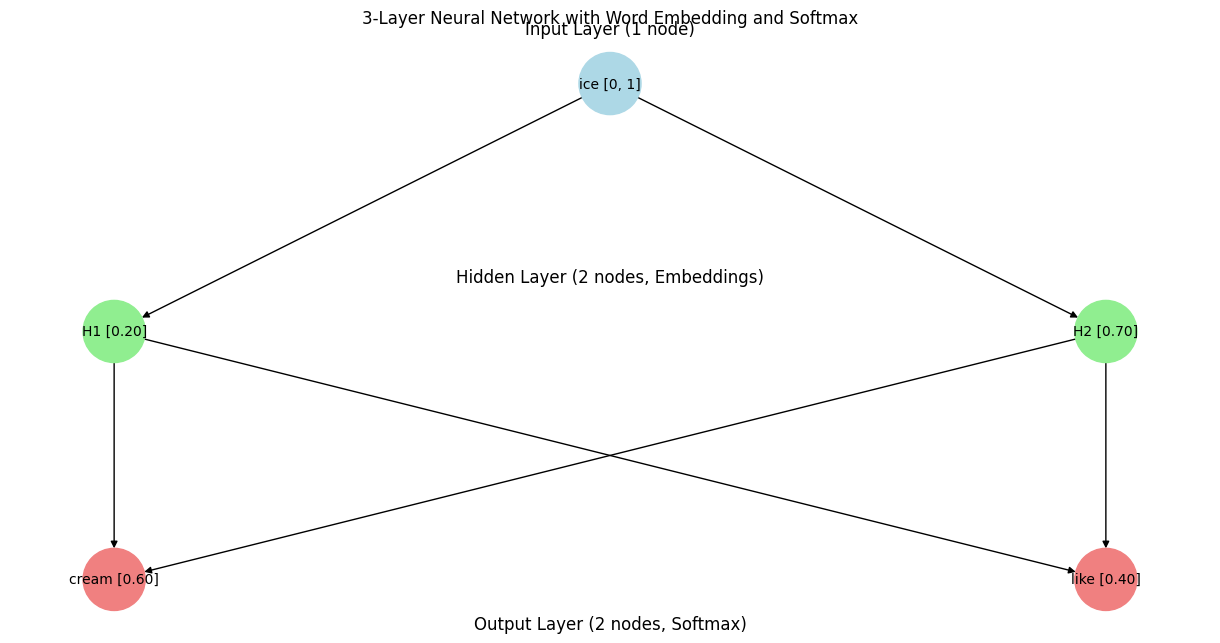

Input Vector (ice): [0 1]
Hidden Weights (as Embeddings):
[[0.5 0.3]
 [0.2 0.7]]
Hidden Output (Embedding for ice): [0.2 0.7]
Output Before Softmax: [0.6  0.21]
Softmax Output: [0.5962827 0.4037173]
Predicted Class: cream


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Define layers and nodes
input_node = ["ice [0, 1]"]  # Input vector for "ice"
hidden_nodes = [f"H{i+1}" for i in range(2)]  # 2 hidden nodes
output_nodes = ["cream", "like"]  # 2 output nodes for softmax

# Add nodes with layer information
for node in input_node:
    G.add_node(node, layer=0, color='lightblue')
for node in hidden_nodes:
    G.add_node(node, layer=1, color='lightgreen')
for node in output_nodes:
    G.add_node(node, layer=2, color='lightcoral')

# Add edges (fully connected between layers)
for input_n in input_node:
    for hidden_n in hidden_nodes:
        G.add_edge(input_n, hidden_n)
for hidden_n in hidden_nodes:
    for output_n in output_nodes:
        G.add_edge(hidden_n, output_n)

# Define positions for layers
pos = {}
pos[input_node[0]] = (0, 2)  # Input node at center of layer 0
for i, node in enumerate(hidden_nodes):
    pos[node] = (i * 2 - 1, 1)  # 2 hidden nodes, centered and spaced
for i, node in enumerate(output_nodes):
    pos[node] = (i * 2 - 1, 0)  # 2 output nodes, spaced

# Sample hidden layer weights (acting as embeddings for "ice")
hidden_weights = np.array([[0.5, 0.3], [0.2, 0.7]])  # 2x2 matrix from input [0, 1] to hidden

# Compute hidden layer output (embedding) for visualization
input_vector = np.array([0, 1])  # [0, 1] for "ice"
hidden_output = np.dot(input_vector, hidden_weights)  # Dot product as embedding
hidden_output = np.maximum(hidden_output, 0)  # ReLU activation

# Sample output weights and bias (from hidden to output)
output_weights = np.array([[0.4, 0.1], [0.6, 0.2]])  # 2x2 matrix
output_bias = np.array([0.1, 0.05])
output_before_softmax = np.dot(hidden_output, output_weights) + output_bias

# Softmax computation
exp_output = np.exp(output_before_softmax - np.max(output_before_softmax))  # For stability
softmax_output = exp_output / np.sum(exp_output)
predicted_class = output_nodes[np.argmax(softmax_output)]

# Add computed values as node labels or annotations
hidden_labels = {f"H{i+1}": f"H{i+1} [{hidden_output[i]:.2f}]" for i in range(2)}
output_labels = {node: f"{node} [{softmax_output[i]:.2f}]" for i, node in enumerate(output_nodes)}
output_labels["Prediction"] = f"Predicted: {predicted_class}"

# Draw the network
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=False, node_color=[G.nodes[n]['color'] for n in G.nodes],
        node_size=2000, font_size=10, font_weight='bold', arrows=True)

# Add custom labels with computed values
for node, (x, y) in pos.items():
    if node in hidden_labels:
        plt.text(x, y, hidden_labels[node], fontsize=10, ha='center', va='center')
    elif node in output_labels and node != "Prediction":
        plt.text(x, y, output_labels[node], fontsize=10, ha='center', va='center')
    elif node == "ice [0, 1]":
        plt.text(x, y, node, fontsize=10, ha='center', va='center')
    elif node == "Prediction":
        plt.text(0, -0.5, output_labels[node], fontsize=10, ha='center', va='center')

# Add layer labels
plt.text(0, 2.2, "Input Layer (1 node)", fontsize=12, ha='center')
plt.text(0, 1.2, "Hidden Layer (2 nodes, Embeddings)", fontsize=12, ha='center')
plt.text(0, -0.2, "Output Layer (2 nodes, Softmax)", fontsize=12, ha='center')

# Customize the plot
plt.title("3-Layer Neural Network with Word Embedding and Softmax")
plt.axis('off')  # Hide axes
plt.show()

# Print computations for reference
print("Input Vector (ice):", input_vector)
print("Hidden Weights (as Embeddings):")
print(hidden_weights)
print("Hidden Output (Embedding for ice):", hidden_output)
print("Output Before Softmax:", output_before_softmax)
print("Softmax Output:", softmax_output)
print("Predicted Class:", predicted_class)

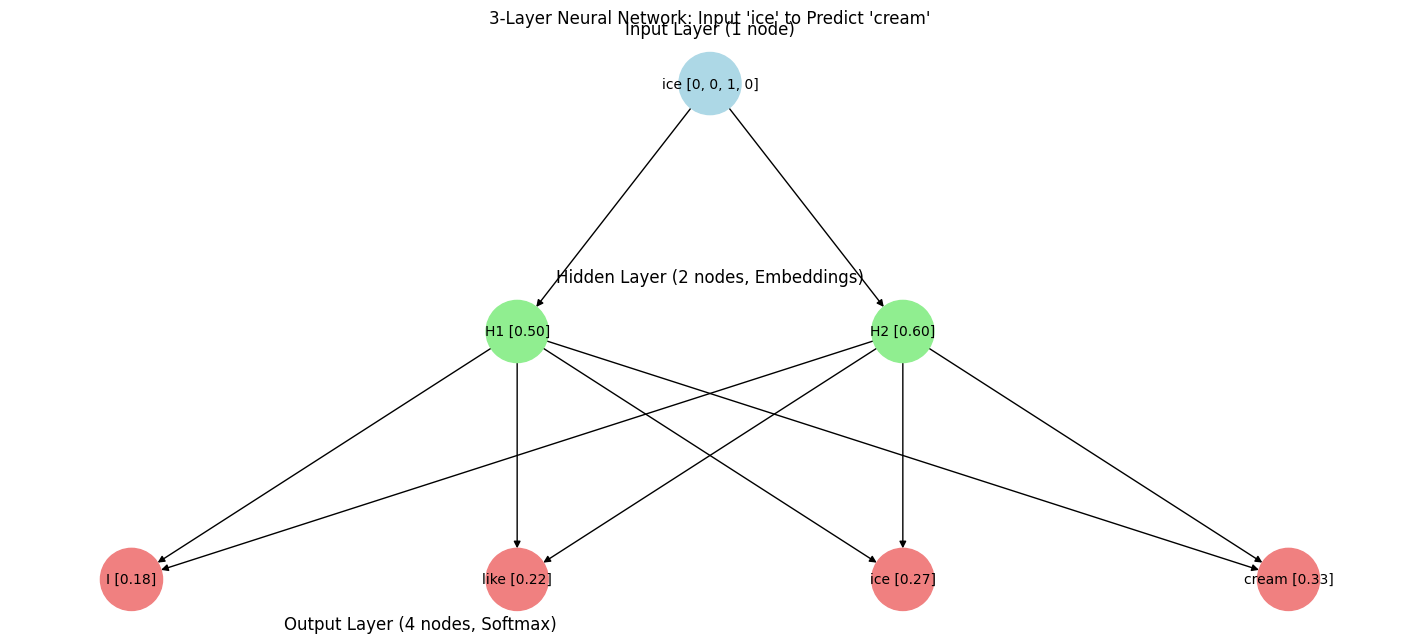

Input Vector (ice): [0 0 1 0]
Hidden Weights (as Embeddings):
[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
Hidden Output (Embedding for ice): [0.5 0.6]
Output Before Softmax: [0.45 0.66 0.87 1.08]
Softmax Output: [0.17751741 0.21899934 0.27017468 0.33330857]
Predicted Class: cream


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Define layers and nodes
vocabulary = ["I", "like", "ice", "cream"]
input_node = ["ice [0, 0, 1, 0]"]  # One-hot input for "ice"
hidden_nodes = [f"H{i+1}" for i in range(2)]  # 2 hidden nodes
output_nodes = vocabulary  # 4 output nodes (full vocabulary)

# Add nodes with layer information
for node in input_node:
    G.add_node(node, layer=0, color='lightblue')
for node in hidden_nodes:
    G.add_node(node, layer=1, color='lightgreen')
for node in output_nodes:
    G.add_node(node, layer=2, color='lightcoral')

# Add edges (fully connected between layers)
for input_n in input_node:
    for hidden_n in hidden_nodes:
        G.add_edge(input_n, hidden_n)
for hidden_n in hidden_nodes:
    for output_n in output_nodes:
        G.add_edge(hidden_n, output_n)

# Define positions for layers
pos = {}
pos[input_node[0]] = (0, 2)  # Input node at center of layer 0
for i, node in enumerate(hidden_nodes):
    pos[node] = (i * 2 - 1, 1)  # 2 hidden nodes, centered and spaced
for i, node in enumerate(output_nodes):
    pos[node] = (i * 2 - 3, 0)  # 4 output nodes, spaced horizontally

# Sample hidden layer weights (acting as embeddings for "ice")
hidden_weights = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6], [0.7, 0.8]])  # 4x2 matrix
input_vector = np.array([0, 0, 1, 0])  # One-hot for "ice"
hidden_output = np.dot(input_vector, hidden_weights)  # Dot product as embedding
hidden_output = np.maximum(hidden_output, 0)  # ReLU activation

# Sample output weights and bias
output_weights = np.array([[0.1, 0.2, 0.3, 0.4], [0.5, 0.6, 0.7, 0.8]])  # 2x4 matrix
output_bias = np.array([0.1, 0.2, 0.3, 0.4])
output_before_softmax = np.dot(hidden_output, output_weights) + output_bias

# Softmax computation
exp_output = np.exp(output_before_softmax - np.max(output_before_softmax))  # For stability
softmax_output = exp_output / np.sum(exp_output)
predicted_class = output_nodes[np.argmax(softmax_output)]

# Add computed values as node labels or annotations
hidden_labels = {f"H{i+1}": f"H{i+1} [{hidden_output[i]:.2f}]" for i in range(2)}
output_labels = {node: f"{node} [{softmax_output[i]:.2f}]" for i, node in enumerate(output_nodes)}
output_labels["Prediction"] = f"Predicted: {predicted_class}"

# Draw the network
plt.figure(figsize=(14, 6))
nx.draw(G, pos, with_labels=False, node_color=[G.nodes[n]['color'] for n in G.nodes],
        node_size=2000, font_size=10, font_weight='bold', arrows=True)

# Add custom labels with computed values
for node, (x, y) in pos.items():
    if node in hidden_labels:
        plt.text(x, y, hidden_labels[node], fontsize=10, ha='center', va='center')
    elif node in output_labels and node != "Prediction":
        plt.text(x, y, output_labels[node], fontsize=10, ha='center', va='center')
    elif node == "ice [0, 0, 1, 0]":
        plt.text(x, y, node, fontsize=10, ha='center', va='center')
    elif node == "Prediction":
        plt.text(-1.5, -0.5, output_labels[node], fontsize=10, ha='center', va='center')

# Add layer labels
plt.text(0, 2.2, "Input Layer (1 node)", fontsize=12, ha='center')
plt.text(0, 1.2, "Hidden Layer (2 nodes, Embeddings)", fontsize=12, ha='center')
plt.text(-1.5, -0.2, "Output Layer (4 nodes, Softmax)", fontsize=12, ha='center')

# Customize the plot
plt.title("3-Layer Neural Network: Input 'ice' to Predict 'cream'")
plt.axis('off')  # Hide axes
plt.show()

# Print computations for reference
print("Input Vector (ice):", input_vector)
print("Hidden Weights (as Embeddings):")
print(hidden_weights)
print("Hidden Output (Embedding for ice):", hidden_output)
print("Output Before Softmax:", output_before_softmax)
print("Softmax Output:", softmax_output)
print("Predicted Class:", predicted_class)

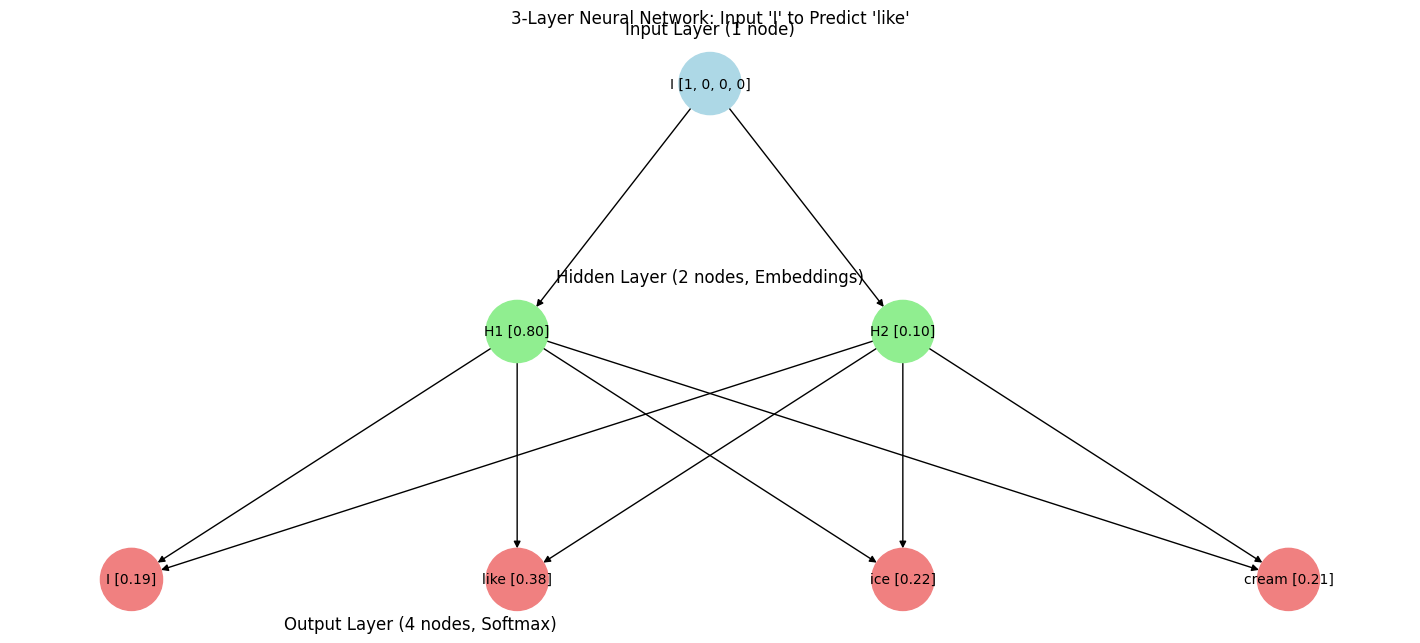

Input Vector (I): [1 0 0 0]
Hidden Weights (as Embeddings):
[[0.8 0.1]
 [0.2 0.9]
 [0.3 0.4]
 [0.5 0.6]]
Hidden Output (Embedding for I): [0.8 0.1]
Output Before Softmax: [0.22 0.94 0.37 0.36]
Softmax Output: [0.18633976 0.38282259 0.21649591 0.21434174]
Predicted Class: like


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Define layers and nodes
vocabulary = ["I", "like", "ice", "cream"]
input_node = ["I [1, 0, 0, 0]"]  # One-hot input for "I"
hidden_nodes = [f"H{i+1}" for i in range(2)]  # 2 hidden nodes
output_nodes = vocabulary  # 4 output nodes (full vocabulary)

# Add nodes with layer information
for node in input_node:
    G.add_node(node, layer=0, color='lightblue')
for node in hidden_nodes:
    G.add_node(node, layer=1, color='lightgreen')
for node in output_nodes:
    G.add_node(node, layer=2, color='lightcoral')

# Add edges (fully connected between layers)
for input_n in input_node:
    for hidden_n in hidden_nodes:
        G.add_edge(input_n, hidden_n)
for hidden_n in hidden_nodes:
    for output_n in output_nodes:
        G.add_edge(hidden_n, output_n)

# Define positions for layers
pos = {}
pos[input_node[0]] = (0, 2)  # Input node at center of layer 0
for i, node in enumerate(hidden_nodes):
    pos[node] = (i * 2 - 1, 1)  # 2 hidden nodes, centered and spaced
for i, node in enumerate(output_nodes):
    pos[node] = (i * 2 - 3, 0)  # 4 output nodes, spaced horizontally

# Sample hidden layer weights (acting as embeddings for "I")
hidden_weights = np.array([[0.8, 0.1], [0.2, 0.9], [0.3, 0.4], [0.5, 0.6]])  # 4x2 matrix
input_vector = np.array([1, 0, 0, 0])  # One-hot for "I"
hidden_output = np.dot(input_vector, hidden_weights)  # Dot product as embedding
hidden_output = np.maximum(hidden_output, 0)  # ReLU activation

# Sample output weights and bias
output_weights = np.array([[0.1, 0.7, 0.2, 0.3], [0.4, 0.8, 0.1, 0.2]])  # 2x4 matrix
output_bias = np.array([0.1, 0.3, 0.2, 0.1])
output_before_softmax = np.dot(hidden_output, output_weights) + output_bias

# Softmax computation
exp_output = np.exp(output_before_softmax - np.max(output_before_softmax))  # For stability
softmax_output = exp_output / np.sum(exp_output)
predicted_class = output_nodes[np.argmax(softmax_output)]

# Add computed values as node labels or annotations
hidden_labels = {f"H{i+1}": f"H{i+1} [{hidden_output[i]:.2f}]" for i in range(2)}
output_labels = {node: f"{node} [{softmax_output[i]:.2f}]" for i, node in enumerate(output_nodes)}
output_labels["Prediction"] = f"Predicted: {predicted_class}"

# Draw the network
plt.figure(figsize=(14, 6))
nx.draw(G, pos, with_labels=False, node_color=[G.nodes[n]['color'] for n in G.nodes],
        node_size=2000, font_size=10, font_weight='bold', arrows=True)

# Add custom labels with computed values
for node, (x, y) in pos.items():
    if node in hidden_labels:
        plt.text(x, y, hidden_labels[node], fontsize=10, ha='center', va='center')
    elif node in output_labels and node != "Prediction":
        plt.text(x, y, output_labels[node], fontsize=10, ha='center', va='center')
    elif node == "I [1, 0, 0, 0]":
        plt.text(x, y, node, fontsize=10, ha='center', va='center')
    elif node == "Prediction":
        plt.text(-1.5, -0.5, output_labels[node], fontsize=10, ha='center', va='center')

# Add layer labels
plt.text(0, 2.2, "Input Layer (1 node)", fontsize=12, ha='center')
plt.text(0, 1.2, "Hidden Layer (2 nodes, Embeddings)", fontsize=12, ha='center')
plt.text(-1.5, -0.2, "Output Layer (4 nodes, Softmax)", fontsize=12, ha='center')

# Customize the plot
plt.title("3-Layer Neural Network: Input 'I' to Predict 'like'")
plt.axis('off')  # Hide axes
plt.show()

# Print computations for reference
print("Input Vector (I):", input_vector)
print("Hidden Weights (as Embeddings):")
print(hidden_weights)
print("Hidden Output (Embedding for I):", hidden_output)
print("Output Before Softmax:", output_before_softmax)
print("Softmax Output:", softmax_output)
print("Predicted Class:", predicted_class)

In [ ]:
## Attention Mechanism

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Custom Corpus (repeat new sentences for training)
corpus = ['I had ice cream near the river bank', 'I have ice cream near bank of America'] * 50

# 2. Optional stop word removal
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be', 'had', 'have']  # Added 'had' and 'have' as stop words
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            while stop_word in tmp:  # Handle multiple occurrences
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

corpus = remove_stop_words(corpus)

# 3. Build vocabulary
words = set(word for sentence in corpus for word in sentence.split())
word2int = {word: i for i, word in enumerate(words)}
int2word = {i: word for word, i in word2int.items()}
sentences = [sentence.split() for sentence in corpus]

# 4. Skip-gram data generation
WINDOW_SIZE = 4
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE + 1, len(sentence))]:
            if neighbor != word:
                data.append([word, neighbor])

df = pd.DataFrame(data, columns=['input', 'label'])

# 5. One-hot encoding
ONE_HOT_DIM = len(words)
def to_one_hot_encoding(index):
    vec = np.zeros(ONE_HOT_DIM)
    vec[index] = 1
    return vec

X_train = np.array([to_one_hot_encoding(word2int[w]) for w in df['input']])
Y_train = np.array([to_one_hot_encoding(word2int[w]) for w in df['label']])

# 6. Model with Self-Attention (modified to return attention weights)
EMBEDDING_DIM = 2

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        q = inputs
        k = inputs
        v = inputs
        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)  # Compute weights
        weighted_sum = tf.matmul(attention_weights, v)
        return weighted_sum, attention_weights  # Return both output and weights

    def compute_output_shape(self, input_shape):
        # Define the output shapes for both returns
        batch_size = input_shape[0]
        return [(batch_size, EMBEDDING_DIM), (batch_size, ONE_HOT_DIM, ONE_HOT_DIM)]  # Match shapes

inputs = tf.keras.Input(shape=(ONE_HOT_DIM,))
embedding_layer = tf.keras.layers.Dense(EMBEDDING_DIM, activation='linear')(inputs)
attention_output, attention_weights_output = AttentionLayer()(embedding_layer)
output_layer = tf.keras.layers.Dense(ONE_HOT_DIM, activation='softmax')(attention_output)

# Model with named outputs and Lambda layer for attention_weights
model = tf.keras.Model(inputs=inputs, outputs={
    'prediction': output_layer,
    'attention_weights': tf.keras.layers.Lambda(lambda x: x, name='attention_weights')(attention_weights_output)
})
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss={'prediction': 'categorical_crossentropy', 'attention_weights': None},  # Only compute loss for prediction
              loss_weights={'prediction': 1.0, 'attention_weights': 0.0})

# 7. Train model
model.fit(X_train, {'prediction': Y_train}, epochs=200, verbose=1)

# 8. Get embeddings and attention weights
embedding_model = tf.keras.Model(inputs=inputs, outputs=embedding_layer)
attention_model = tf.keras.Model(inputs=inputs, outputs=attention_output)

# Predict to compute embeddings and attention weights
raw_output = model.predict(X_train[:len(words)])  # Get raw output for debugging
print("Raw Output:", raw_output)  # Debug the raw output
print("Raw Output Type:", type(raw_output))  # Debug the type of raw output
print("Raw Output Length:", len(raw_output))  # Debug the number of outputs

# Correctly unpack dictionary
predictions = raw_output['prediction']
attention_weights = raw_output['attention_weights']
print("Predictions Type:", type(predictions))  # Debug the type
print("Attention Weights Type Before Conversion:", type(attention_weights))  # Debug the type
if isinstance(attention_weights, str):
    raise ValueError(f"Attention weights is a string: {attention_weights}. Check model output configuration.")
# Convert to tensor and then to NumPy
attention_weights = tf.convert_to_tensor(attention_weights).numpy()
print("Attention Weights Shape:", attention_weights.shape)
print("Attention Weights Dtype:", attention_weights.dtype)
print("Attention Weights Sample:", attention_weights[0])  # Debug output

# Ensure attention_weights is numerical
attention_weights = attention_weights.astype(np.float32)  # Force numerical dtype

original_embeddings = embedding_model.predict(X_train[:len(words)])
attention_embeddings = attention_model.predict(X_train[:len(words)])

# 9. Display and prepare data
word_list = list(word2int.keys())
df_embed = pd.DataFrame(original_embeddings, columns=["embed_x1", "embed_x2"])
df_attn = pd.DataFrame(attention_embeddings, columns=["attn_x1", "attn_x2"])

df_words = pd.DataFrame({"word": word_list})
df_final = pd.concat([df_words, df_embed, df_attn], axis=1)

print("\nWord Vectors Before and After Attention:\n")
print(df_final.round(4))

# 10. Enhanced Visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Plot all embeddings
for _, row in df_final.iterrows():
    ax.scatter(row['embed_x1'], row['embed_x2'], color='blue', s=100, label=row['word'] if row['word'] == 'bank' else "")
    ax.annotate(row['word'], (row['embed_x1'], row['embed_x2']), color='blue', xytext=(5, 5), textcoords='offset points')
    ax.scatter(row['attn_x1'], row['attn_x2'], color='green', marker='x', s=100)
    ax.annotate(row['word'], (row['attn_x1'], row['attn_x2']), color='green', xytext=(5, 5), textcoords='offset points')

# Find index of "bank" and its context words
bank_idx = word2int['bank']
river_idx = word2int['river']
america_idx = word2int['America']

# Get attention weights for "bank" with respect to all words
bank_attention = attention_weights[bank_idx]  # Attention scores for "bank" as query

# Normalize attention weights for visualization (sum to 1 for "bank" row)
bank_attention_normalized = bank_attention / np.sum(bank_attention)

# Highlight attention to "river" (sentence 1) and "America" (sentence 2)
if river_idx < len(bank_attention):
    river_attention = bank_attention_normalized[river_idx]
    ax.annotate(f'Attends river ({river_attention:.2f})',
                (df_final.iloc[bank_idx]['embed_x1'], df_final.iloc[bank_idx]['embed_x2']),
                xytext=(0, -20), textcoords='offset points', color='purple',
                arrowprops=dict(facecolor='purple', shrink=0.05))

if america_idx < len(bank_attention):
    america_attention = bank_attention_normalized[america_idx]
    ax.annotate(f'Attends America ({america_attention:.2f})',
                (df_final.iloc[bank_idx]['embed_x1'], df_final.iloc[bank_idx]['embed_x2']),
                xytext=(0, -40), textcoords='offset points', color='orange',
                arrowprops=dict(facecolor='orange', shrink=0.05))

# Draw arrows from original to attention embeddings for all words
for _, row in df_final.iterrows():
    ax.arrow(row['embed_x1'], row['embed_x2'],
             row['attn_x1'] - row['embed_x1'],
             row['attn_x2'] - row['embed_x2'],
             color='red', head_width=0.05, alpha=0.5)

plt.title("Word Embeddings (Blue) and Attention Output (Green) with 'bank' Attention")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.legend()
plt.show()

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1863
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1439
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1323
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1232
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1316
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1406
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1293
Epoch 8/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1332
Epoch 9/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1319
Epoch 10/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1375
Epoch 11/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1252
Epoch 12/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1302
Epoch 13/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1294
Epoch 14/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1326
Epoch 15/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0

ValueError: Attention weights is a string: attention_weights. Check model output configuration.

In [ ]:
# Copy of Attention

Epoch 1/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3750
Epoch 2/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3128
Epoch 3/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3056
Epoch 4/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2999
Epoch 5/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2986
Epoch 6/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2977
Epoch 7/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2988
Epoch 8/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2887
Epoch 9/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2900
Epoch 10/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2865
Epoch 11/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2905
Epoch 12/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2891
Epoch 13/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2949
Epoch 14/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2801
Epoch 15/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 0

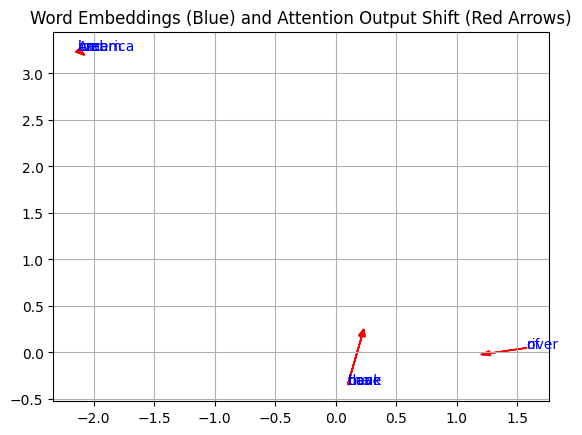

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Custom Corpus (repeat sentences for training)
#corpus = ['I love ice cream', 'I like ice cream'] * 50
# 1. Custom Corpus (repeat updated sentences for training)
corpus = [
    'I had ice cream near the river bank',
    'I have ice cream near bank of America'
] * 50


# 2. Optional stop word removal
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

corpus = remove_stop_words(corpus)

# 3. Build vocabulary
words = set(word for sentence in corpus for word in sentence.split())
word2int = {word: i for i, word in enumerate(words)}
int2word = {i: word for word, i in word2int.items()}
sentences = [sentence.split() for sentence in corpus]

# 4. Skip-gram data generation
WINDOW_SIZE = 4
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE + 1, len(sentence))]:
            if neighbor != word:
                data.append([word, neighbor])

df = pd.DataFrame(data, columns=['input', 'label'])

# 5. One-hot encoding
ONE_HOT_DIM = len(words)
def to_one_hot_encoding(index):
    vec = np.zeros(ONE_HOT_DIM)
    vec[index] = 1
    return vec

X_train = np.array([to_one_hot_encoding(word2int[w]) for w in df['input']])
Y_train = np.array([to_one_hot_encoding(word2int[w]) for w in df['label']])

# 6. Model with Self-Attention
EMBEDDING_DIM = 2

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        q = inputs
        k = inputs
        v = inputs
        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        weighted_sum = tf.matmul(attention_weights, v)
        return weighted_sum

inputs = tf.keras.Input(shape=(ONE_HOT_DIM,))
embedding_layer = tf.keras.layers.Dense(EMBEDDING_DIM, activation='linear')(inputs)
attention_output = AttentionLayer()(embedding_layer)
output_layer = tf.keras.layers.Dense(ONE_HOT_DIM, activation='softmax')(attention_output)

model = tf.keras.Model(inputs=inputs, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='categorical_crossentropy')

# 7. Train model
model.fit(X_train, Y_train, epochs=200, verbose=1)

# 8. Get embeddings before and after attention
embedding_model = tf.keras.Model(inputs=inputs, outputs=embedding_layer)
attention_model = tf.keras.Model(inputs=inputs, outputs=attention_output)

original_embeddings = embedding_model.predict(X_train[:len(words)])
attention_embeddings = attention_model.predict(X_train[:len(words)])

# 9. Display and print embeddings
word_list = list(word2int.keys())
df_embed = pd.DataFrame(original_embeddings, columns=["embed_x1", "embed_x2"])
#df_attn = pd.DataFrame(attention_embeddings[:, 0], columns=["attn_x1", "attn_x2"])
df_attn = pd.DataFrame(attention_embeddings, columns=["attn_x1", "attn_x2"])

df_words = pd.DataFrame({"word": word_list})
df_final = pd.concat([df_words, df_embed, df_attn], axis=1)

print("\nWord Vectors Before and After Attention:\n")
print(df_final.round(4))

# 10. (Optional) Visualization
fig, ax = plt.subplots()
for _, row in df_final.iterrows():
    ax.annotate(row['word'], (row['embed_x1'], row['embed_x2']), color='blue')
    ax.arrow(row['embed_x1'], row['embed_x2'],
             row['attn_x1'] - row['embed_x1'],
             row['attn_x2'] - row['embed_x2'],
             color='red', head_width=0.05)

plt.title("Word Embeddings (Blue) and Attention Output Shift (Red Arrows)")
plt.grid(True)
plt.show()


In [ ]:
## Multi Head Attention

Epoch 0, Loss: 368.7594
Epoch 100, Loss: 6.3834
Epoch 200, Loss: 128.7812

🧠 Head 0 attention from 'bank' at index 7:
          bank : 0.3337
          bank : 0.3137
         money : 0.3031
             i : 0.0433
          near : 0.0061

🧠 Head 0 attention from 'bank' at index 12:
             i : 0.5000
          bank : 0.4995
          bank : 0.0003
         money : 0.0002
       deposit : 0.0000


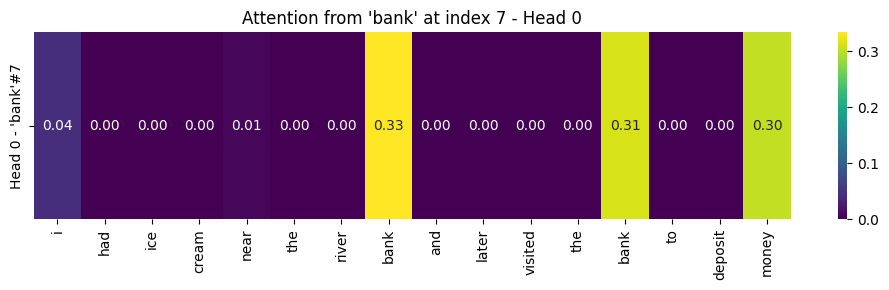

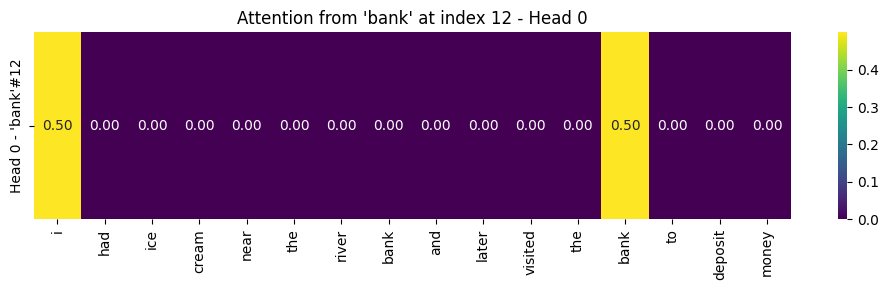

<ipython-input-49-6f74f1070acd>:155: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


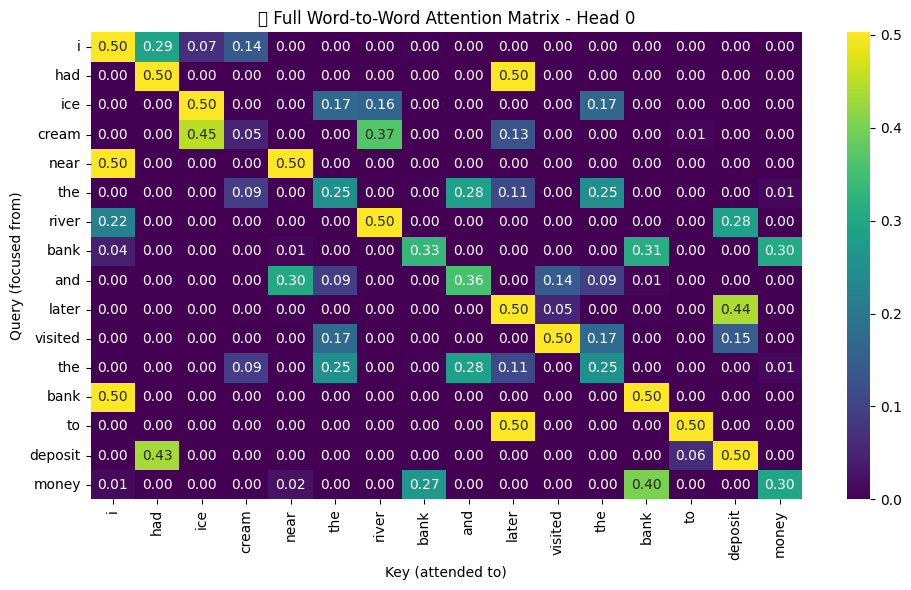

In [49]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Enhanced Disambiguation Corpus ===
corpus = [
    # River bank
    "I sat near the river bank and watched the ducks",
    "They walked beside the river bank on a sunny day",
    "We had lunch next to the river bank",
    "She painted the view from the river bank",
    "The boat was tied at the river bank",

    # Money bank
    "I went to the bank and deposited cash",
    "She withdrew money from the bank yesterday",
    "They opened a new account at the bank",
    "The bank approved my home loan",
    "He paid the bill at the bank counter",

    # Dual-context sentences
    "I sat near the river bank and later visited the bank to deposit money",
    "They walked by the river bank and then went to the bank to withdraw cash",
    "We had lunch beside the river bank and paid the bill at the bank",
    "The boat was docked at the river bank before we visited the bank",
    "She painted the river bank and applied for a loan at the bank",
] * 10  # Repeat for stronger learning

# === 2. Tokenizer ===
words = sorted(set(" ".join(corpus).lower().split()))
word2idx = {w: i for i, w in enumerate(words)}
idx2word = {i: w for w, i in word2idx.items()}
word2idx["<UNK>"] = len(word2idx)
idx2word[len(idx2word)] = "<UNK>"

def tokenize(sentence):
    return [word2idx.get(w, word2idx["<UNK>"]) for w in sentence.lower().split()]

# === 3. Model with 2 Attention Layers ===
vocab_size = len(word2idx)
embedding_dim = 64
num_heads = 2
max_len = 50

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.attn_weights = None

    def forward(self, x):
        out, weights = self.attn(x, x, x, need_weights=True)
        self.attn_weights = weights
        return out

class EnhancedTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, max_len):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.pos_embed = nn.Embedding(max_len, embed_dim)

        self.attn1 = MultiHeadSelfAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)

        self.attn2 = MultiHeadSelfAttention(embed_dim, num_heads)
        self.norm2 = nn.LayerNorm(embed_dim)

        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        positions = torch.arange(x.size(1), device=x.device).unsqueeze(0)
        x = self.embed(x) + self.pos_embed(positions)

        x = self.attn1(x)
        x = self.norm1(x)

        x = self.attn2(x)
        x = self.norm2(x)

        x = self.dropout(x)
        return self.fc(x)

# === 4. Training ===
model = EnhancedTransformer(vocab_size, embedding_dim, num_heads, max_len)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(300):  # Can increase to 500
    total_loss = 0
    for sentence in corpus:
        tokens = tokenize(sentence)
        if len(tokens) < 2:
            continue
        input_ids = torch.tensor(tokens[:-1]).unsqueeze(0)
        target_ids = torch.tensor(tokens[1:]).unsqueeze(0)
        output = model(input_ids)
        loss = loss_fn(output.view(-1, vocab_size), target_ids.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# === 5. Test Sentence ===
test_sentence = "I had ice cream near the river bank and later visited the bank to deposit money"
tokens = test_sentence.lower().split()
test_tokens = tokenize(test_sentence)
input_ids = torch.tensor(test_tokens).unsqueeze(0)

# === 6. Collect Attention Weights ===
_ = model(input_ids)
attn_weights = model.attn2.attn_weights  # final attention layer

if attn_weights.dim() == 3:
    attn_weights = attn_weights.unsqueeze(0)

bank_indices = [i for i, t in enumerate(tokens) if t == "bank"]

# === 7. Print Top Attention from Each 'bank' ===
for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        print(f"\n🧠 Head {head} attention from 'bank' at index {idx}:")
        attn_vector = attn_weights[0, head, idx, :]
        attn = attn_vector.detach().numpy()
        context_scores = list(zip(tokens, attn))
        context_scores.sort(key=lambda x: x[1], reverse=True)
        for token, score in context_scores[:5]:
            print(f"  {token:>12} : {score:.4f}")

# === 8. Heatmap from Each 'bank' Token ===
for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        plt.figure(figsize=(10, 3))
        sns.heatmap(attn_weights[0, head, idx].detach().numpy().reshape(1, -1),
                    xticklabels=tokens,
                    yticklabels=[f"Head {head} - 'bank'#{idx}"],
                    cmap="viridis", annot=True, fmt=".2f")
        plt.title(f"Attention from 'bank' at index {idx} - Head {head}")
        plt.tight_layout()
        plt.show()

# === 9. Full Attention Matrix for Both Heads ===
for head in range(attn_weights.shape[1]):
    plt.figure(figsize=(10, 6))
    sns.heatmap(attn_weights[0, head].detach().numpy(),
                xticklabels=tokens,
                yticklabels=tokens,
                cmap="viridis", annot=True, fmt=".2f")
    plt.title(f"🧠 Full Word-to-Word Attention Matrix - Head {head}")
    plt.xlabel("Key (attended to)")
    plt.ylabel("Query (focused from)")
    plt.tight_layout()
    plt.show()


In [50]:
head

0

In [ ]:
# updated Multi Head Attention

corpus ['i sat river bank watched ducks', 'walked beside river bank sunny day', 'lunch next river bank', 'she painted view from river bank', 'boat tied river bank', 'i went bank deposited cash', 'she withdrew money from bank yesterday', 'opened new account bank', 'bank approved my home loan', 'he paid bill bank counter', 'i sat river bank later visited bank deposit money', 'walked river bank went bank withdraw cash', 'lunch beside river bank paid bill bank', 'boat docked river bank before visited bank', 'she painted river bank applied loan bank', 'i sat river bank watched ducks', 'walked beside river bank sunny day', 'lunch next river bank', 'she painted view from river bank', 'boat tied river bank', 'i went bank deposited cash', 'she withdrew money from bank yesterday', 'opened new account bank', 'bank approved my home loan', 'he paid bill bank counter', 'i sat river bank later visited bank deposit money', 'walked river bank went bank withdraw cash', 'lunch beside river bank paid bill

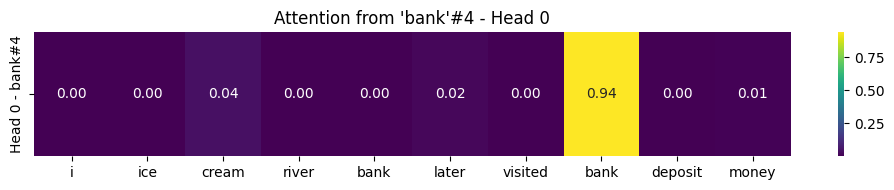


🧠 Head 0 attention from 'bank' at index 7:
           i: 0.0000
         ice: 0.0000
       cream: 0.0014
       river: 0.0007
        bank: 0.1352
       later: 0.0004
     visited: 0.0000
        bank: 0.8622
     deposit: 0.0000
       money: 0.0001


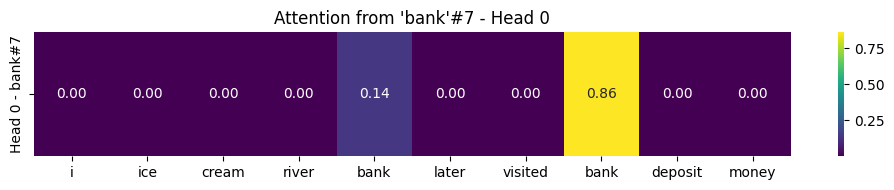


🧠 Head 1 attention from 'bank' at index 4:
           i: 0.1072
         ice: 0.0228
       cream: 0.1952
       river: 0.0823
        bank: 0.0030
       later: 0.1336
     visited: 0.0507
        bank: 0.0031
     deposit: 0.3476
       money: 0.0544


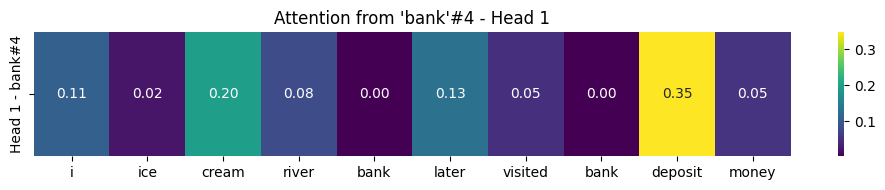


🧠 Head 1 attention from 'bank' at index 7:
           i: 0.4407
         ice: 0.0088
       cream: 0.0003
       river: 0.0011
        bank: 0.0017
       later: 0.0002
     visited: 0.0221
        bank: 0.0043
     deposit: 0.0035
       money: 0.5173


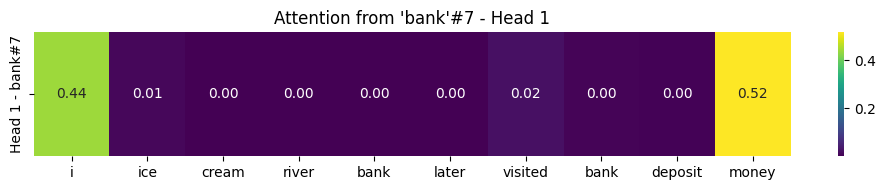

<ipython-input-14-361b055caf45>:161: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


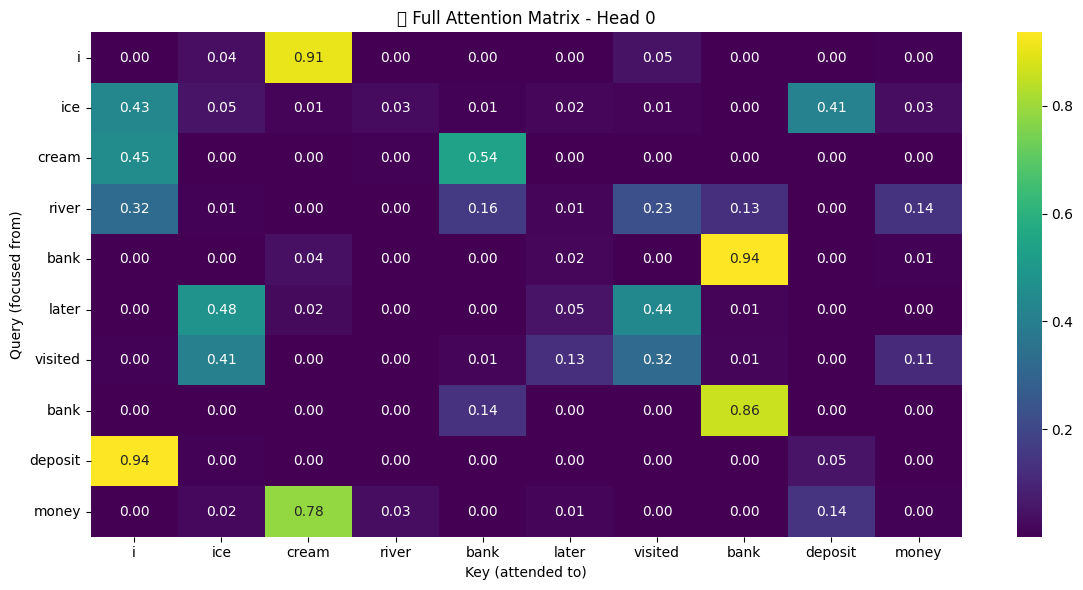

<ipython-input-14-361b055caf45>:161: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


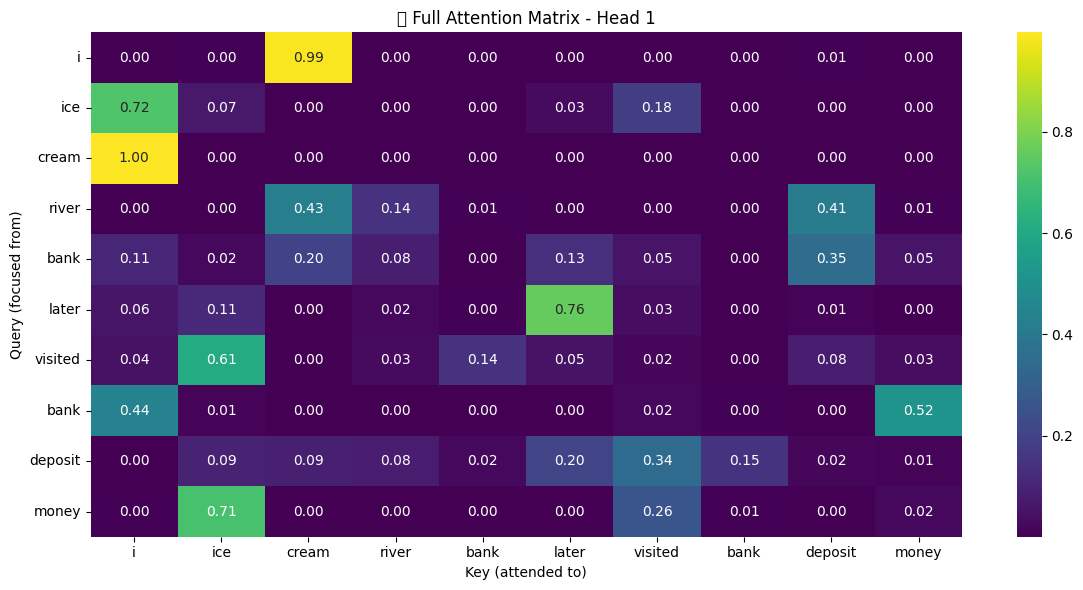

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Original Corpus ===

corpus = [
    "I sat near the river bank and watched the ducks",
    "They walked beside the river bank on a sunny day",
    "We had lunch next to the river bank",
    "She painted the view from the river bank",
    "The boat was tied at the river bank",
    "I went to the bank and deposited cash",
    "She withdrew money from the bank yesterday",
    "They opened a new account at the bank",
    "The bank approved my home loan",
    "He paid the bill at the bank counter",
    "I sat near the river bank and later visited the bank to deposit money",
    "They walked by the river bank and then went to the bank to withdraw cash",
    "We had lunch beside the river bank and paid the bill at the bank",
    "The boat was docked at the river bank before we visited the bank",
    "She painted the river bank and applied for a loan at the bank",
] * 5
'''
corpus = [
    # River bank
    "I sat near the river bank and watched the ducks",
    "They walked beside the river bank on a sunny day",
    "We had lunch next to the river bank",
    "She painted the view from the river bank",
    "The boat was tied at the river bank",

    # Money bank
    "I went to the bank and deposited cash",
    "She withdrew money from the bank yesterday",
    "They opened a new account at the bank",
    "The bank approved my home loan",
    "He paid the bill at the bank counter",

    # Dual-context sentences
    "I sat near the river bank and later visited the bank to deposit money",
    "They walked by the river bank and then went to the bank to withdraw cash",
    "We had lunch beside the river bank and paid the bill at the bank",
    "The boat was docked at the river bank before we visited the bank",
    "She painted the river bank and applied for a loan at the bank",
] * 10  # Repeat for stronger learning

'''
# === 2. Stop Word Removal ===
stop_words = {
    "the", "is", "and", "a", "an", "to", "of", "on", "at", "in", "for", "by", "then", "they", "we", "had", "was","near"
}

def remove_stop_words(corpus):
    return [
        " ".join(word for word in sentence.lower().split() if word not in stop_words)
        for sentence in corpus
    ]

corpus = remove_stop_words(corpus)

print("corpus",corpus)

# === 3. Tokenizer ===
words = sorted(set(" ".join(corpus).split()))
word2idx = {w: i for i, w in enumerate(words)}
idx2word = {i: w for w, i in word2idx.items()}
word2idx["<UNK>"] = len(word2idx)
idx2word[len(idx2word)] = "<UNK>"

def tokenize(sentence):
    return [word2idx.get(w, word2idx["<UNK>"]) for w in sentence.lower().split()]

# === 4. Model Definitions ===
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.attn_weights = None

    def forward(self, x):
        out, weights = self.attn(x, x, x, need_weights=True, average_attn_weights=False)
        self.attn_weights = weights
        return out

class SimpleTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, max_len=50):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.pos = nn.Embedding(max_len, embed_dim)
        self.attn = MultiHeadSelfAttention(embed_dim, num_heads)
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        pos_ids = torch.arange(x.size(1), device=x.device).unsqueeze(0)
        x = self.embed(x) + self.pos(pos_ids)
        x = self.attn(x)
        return self.fc(x)

# === 5. Training ===
vocab_size = len(word2idx)
embedding_dim = 32
num_heads = 2
model = SimpleTransformer(vocab_size, embedding_dim, num_heads)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(50):  # Reduce for speed
    for sentence in corpus:
        ids = tokenize(sentence)
        if len(ids) < 2:
            continue
        input_ids = torch.tensor(ids[:-1]).unsqueeze(0)
        target_ids = torch.tensor(ids[1:]).unsqueeze(0)
        output = model(input_ids)
        loss = loss_fn(output.view(-1, vocab_size), target_ids.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# === 6. Test Sentence (cleaned)
test_sentence = "I had ice cream near the river bank and later visited the bank to deposit money"
test_sentence_clean = " ".join(word for word in test_sentence.lower().split() if word not in stop_words)
tokens = test_sentence_clean.split()
test_ids = tokenize(test_sentence_clean)
input_ids = torch.tensor(test_ids).unsqueeze(0)

# === 7. Run Inference & Get Attention Weights
_ = model(input_ids)
attn_weights = model.attn.attn_weights  # shape: [1, num_heads, T, T]
bank_indices = [i for i, t in enumerate(tokens) if t == "bank"]

# === 8. Print & Plot Attention from 'bank'
for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        print(f"\n🧠 Head {head} attention from 'bank' at index {idx}:")
        attn_vector = attn_weights[0, head, idx]
        for tok, score in zip(tokens, attn_vector.detach().numpy()):
            print(f"{tok:>12}: {score:.4f}")

        # Heatmap of attention from that "bank" token
        plt.figure(figsize=(10, 2))
        sns.heatmap(attn_vector.detach().numpy().reshape(1, -1),
                    xticklabels=tokens,
                    yticklabels=[f"Head {head} - bank#{idx}"],
                    cmap="viridis", annot=True, fmt=".2f")
        plt.title(f"Attention from 'bank'#{idx} - Head {head}")
        plt.tight_layout()
        plt.show()

# === 9. Full Word-to-Word Attention Matrix
for head in range(attn_weights.shape[1]):
    plt.figure(figsize=(12, 6))
    sns.heatmap(attn_weights[0, head].detach().numpy(),
                xticklabels=tokens, yticklabels=tokens,
                cmap="viridis", annot=True, fmt=".2f")
    plt.title(f"🧠 Full Attention Matrix - Head {head}")
    plt.xlabel("Key (attended to)")
    plt.ylabel("Query (focused from)")
    plt.tight_layout()
    plt.show()


In [7]:
corpus

['I sat near the river bank and watched the ducks',
 'They walked beside the river bank on a sunny day',
 'We had lunch next to the river bank',
 'She painted the view from the river bank',
 'The boat was tied at the river bank',
 'I went to the bank and deposited cash',
 'She withdrew money from the bank yesterday',
 'They opened a new account at the bank',
 'The bank approved my home loan',
 'He paid the bill at the bank counter',
 'I sat near the river bank and later visited the bank to deposit money',
 'They walked by the river bank and then went to the bank to withdraw cash',
 'We had lunch beside the river bank and paid the bill at the bank',
 'The boat was docked at the river bank before we visited the bank',
 'She painted the river bank and applied for a loan at the bank',
 'I sat near the river bank and watched the ducks',
 'They walked beside the river bank on a sunny day',
 'We had lunch next to the river bank',
 'She painted the view from the river bank',
 'The boat was tie

Epoch 0, Loss: 300.9751
Epoch 100, Loss: 1.2118
Epoch 200, Loss: 22.9104

🧠 Head 0 attention from 'bank' at index 7:
         later : 0.4974
         cream : 0.3350
       deposit : 0.1050
           and : 0.0327
           ice : 0.0261

🧠 Head 0 attention from 'bank' at index 12:
       visited : 0.3877
            to : 0.2458
           and : 0.1268
          near : 0.1109
          bank : 0.0560


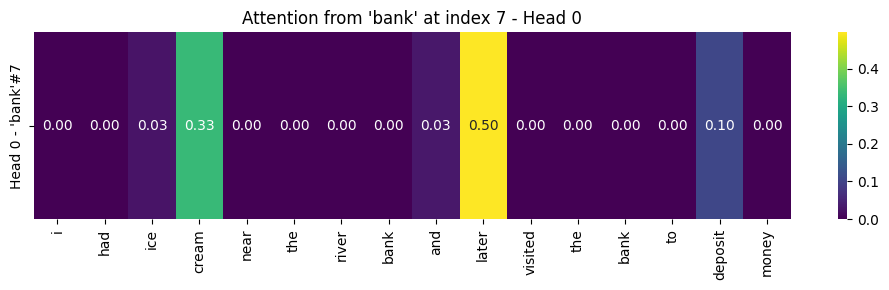

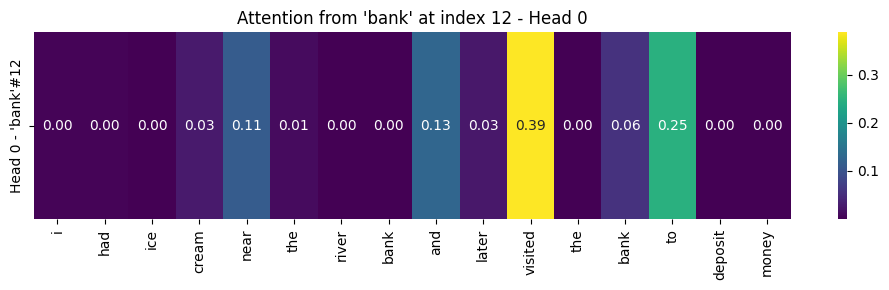

<ipython-input-51-a480772e5c2f>:146: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


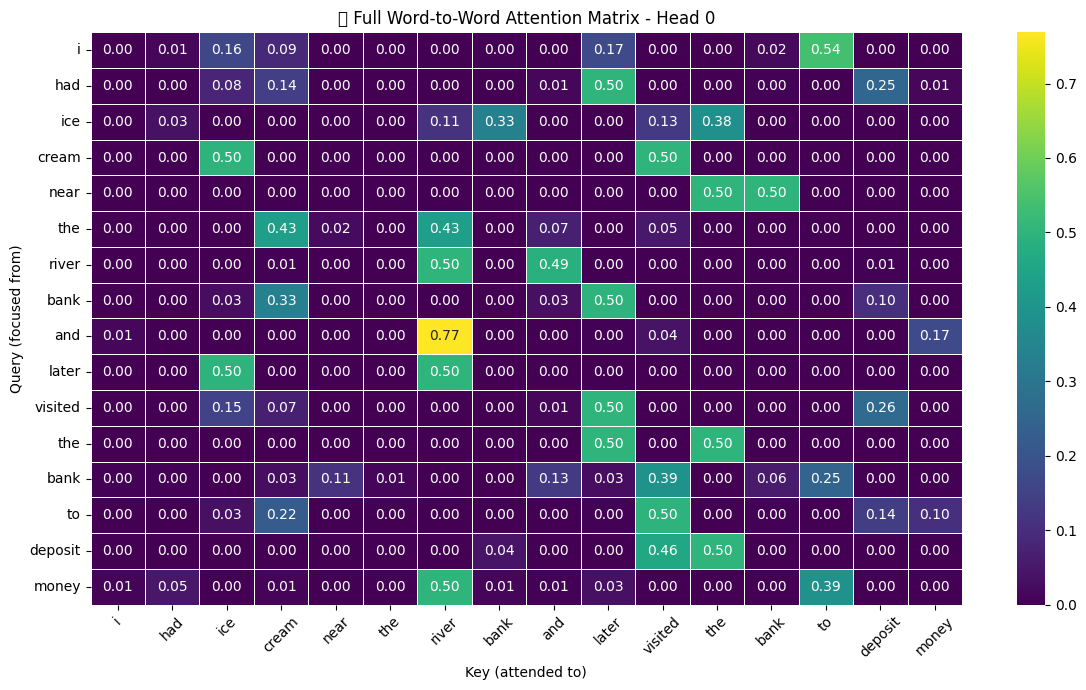

In [51]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1. Disambiguation Corpus =====
corpus = [
    # River bank
    "He sat near the river bank and watched the ducks",
    "They walked beside the river bank on a sunny day",
    "We had lunch next to the river bank",
    "She painted the view from the river bank",
    "The boat was tied at the river bank",

    # Money bank
    "I went to the bank and deposited cash",
    "She withdrew money from the bank yesterday",
    "They opened a new account at the bank",
    "The bank approved my home loan",
    "He paid the bill at the bank counter",

    # Dual context
    "I sat near the river bank and later visited the bank to deposit money",
    "We walked by the river bank and then went to the bank to withdraw cash"
] * 10

# ===== 2. Tokenizer =====
words = sorted(set(" ".join(corpus).lower().split()))
word2idx = {w: i for i, w in enumerate(words)}
idx2word = {i: w for w, i in word2idx.items()}
word2idx["<UNK>"] = len(word2idx)
idx2word[len(idx2word)] = "<UNK>"

def tokenize(sentence):
    return [word2idx.get(w, word2idx["<UNK>"]) for w in sentence.lower().split()]

# ===== 3. Transformer with 2 Attention Layers =====
vocab_size = len(word2idx)
embedding_dim = 64
num_heads = 2
max_len = 50

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.attn_weights = None
    def forward(self, x):
        out, weights = self.attn(x, x, x, need_weights=True)
        self.attn_weights = weights
        return out

class EnhancedTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, max_len):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.pos_embed = nn.Embedding(max_len, embed_dim)
        self.attn1 = MultiHeadSelfAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn2 = MultiHeadSelfAttention(embed_dim, num_heads)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(embed_dim, vocab_size)
    def forward(self, x):
        positions = torch.arange(x.size(1), device=x.device).unsqueeze(0)
        x = self.embed(x) + self.pos_embed(positions)
        x = self.attn1(x)
        x = self.norm1(x)
        x = self.attn2(x)
        x = self.norm2(x)
        x = self.dropout(x)
        return self.fc(x)

# ===== 4. Training =====
model = EnhancedTransformer(vocab_size, embedding_dim, num_heads, max_len)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(300):
    total_loss = 0
    for sentence in corpus:
        tokens = tokenize(sentence)
        if len(tokens) < 2:
            continue
        input_ids = torch.tensor(tokens[:-1]).unsqueeze(0)
        target_ids = torch.tensor(tokens[1:]).unsqueeze(0)
        output = model(input_ids)
        loss = loss_fn(output.view(-1, vocab_size), target_ids.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# ===== 5. Test the model =====
test_sentence = "I had ice cream near the river bank and later visited the bank to deposit money"
tokens = test_sentence.lower().split()
test_tokens = tokenize(test_sentence)
input_ids = torch.tensor(test_tokens).unsqueeze(0)

_ = model(input_ids)
attn_weights = model.attn2.attn_weights
if attn_weights.dim() == 3:
    attn_weights = attn_weights.unsqueeze(0)

bank_indices = [i for i, t in enumerate(tokens) if t == "bank"]

# ===== 6. Print attention from 'bank' per head =====
for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        print(f"\n🧠 Head {head} attention from 'bank' at index {idx}:")
        attn_vector = attn_weights[0, head, idx, :]
        attn = attn_vector.detach().numpy()
        context_scores = list(zip(tokens, attn))
        context_scores.sort(key=lambda x: x[1], reverse=True)
        for token, score in context_scores[:5]:
            print(f"  {token:>12} : {score:.4f}")

# ===== 7. Plot heatmap from each 'bank' per head =====
import matplotlib.pyplot as plt
import seaborn as sns

for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        plt.figure(figsize=(10, 3))
        sns.heatmap(attn_weights[0, head, idx].detach().numpy().reshape(1, -1),
                    xticklabels=tokens,
                    yticklabels=[f"Head {head} - 'bank'#{idx}"],
                    cmap="viridis", annot=True, fmt=".2f")
        plt.title(f"Attention from 'bank' at index {idx} - Head {head}")
        plt.tight_layout()
        plt.show()

# ===== 8. Plot full token-to-token attention matrix per head =====
for head in range(attn_weights.shape[1]):
    plt.figure(figsize=(12, 7))
    sns.heatmap(attn_weights[0, head].detach().numpy(),
                xticklabels=tokens,
                yticklabels=tokens,
                cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f"🧠 Full Word-to-Word Attention Matrix - Head {head}")
    plt.xlabel("Key (attended to)")
    plt.ylabel("Query (focused from)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
#Sine

Epoch 0, Loss: 206.0520
Epoch 100, Loss: 0.0009
Epoch 200, Loss: 0.0000

🧠 Head 0 attention from 'bank' at index 7:
            to : 0.7090
         river : 0.2846
       visited : 0.0032
          bank : 0.0010
          near : 0.0009

🧠 Head 0 attention from 'bank' at index 12:
         river : 0.5702
            to : 0.3890
       visited : 0.0255
         money : 0.0074
          bank : 0.0034


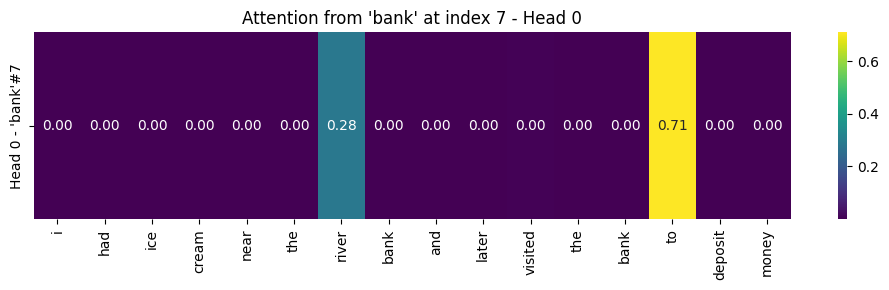

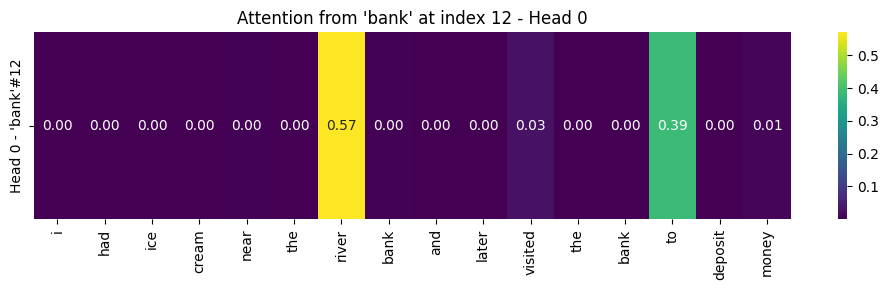

<ipython-input-52-5755b032f5de>:139: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


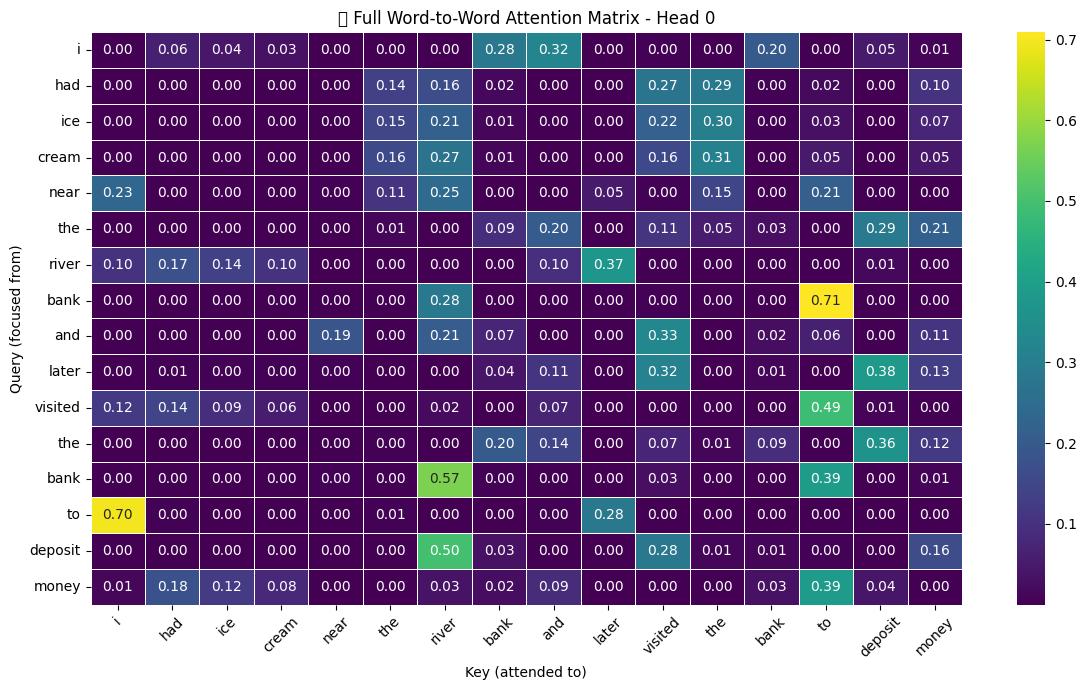

In [52]:
# === Sinusoidal Positional Embedding ===
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Positional Encoding (Sinusoidal)
class SinusoidalPositionalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2) * -(math.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# Corpus
corpus = [
    "I sat near the river bank and later visited the bank to deposit money",
    "She painted the river bank and then walked to the bank to withdraw cash",
    "We walked beside the river bank and paid bills at the bank",
    "The boat was tied at the river bank and they opened a new bank account",
] * 20

# Tokenizer
tokens = sorted(set(" ".join(corpus).lower().split()))
word2idx = {w: i for i, w in enumerate(tokens)}
idx2word = {i: w for w, i in word2idx.items()}
word2idx["<UNK>"] = len(word2idx)
idx2word[len(idx2word)] = "<UNK>"

def tokenize(sentence):
    return [word2idx.get(w, word2idx["<UNK>"]) for w in sentence.lower().split()]

# Model
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.attn_weights = None

    def forward(self, x):
        out, weights = self.attn(x, x, x, need_weights=True)
        self.attn_weights = weights
        return out

class TransformerWithSinPE(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, max_len):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.pos_enc = SinusoidalPositionalEncoding(embed_dim, max_len)
        self.attn1 = MultiHeadSelfAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn2 = MultiHeadSelfAttention(embed_dim, num_heads)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        x = self.embed(x)
        x = self.pos_enc(x)
        x = self.attn1(x)
        x = self.norm1(x)
        x = self.attn2(x)
        x = self.norm2(x)
        return self.fc(x)

# Training
vocab_size = len(word2idx)
embedding_dim = 64
num_heads = 2
model = TransformerWithSinPE(vocab_size, embedding_dim, num_heads, max_len=50)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(300):
    total_loss = 0
    for sentence in corpus:
        tokens_ = tokenize(sentence)
        if len(tokens_) < 2: continue
        input_ids = torch.tensor(tokens_[:-1]).unsqueeze(0)
        target_ids = torch.tensor(tokens_[1:]).unsqueeze(0)
        output = model(input_ids)
        loss = loss_fn(output.view(-1, vocab_size), target_ids.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# Test & Visualization
test_sentence = "I had ice cream near the river bank and later visited the bank to deposit money"
tokens_test = test_sentence.lower().split()
test_ids = tokenize(test_sentence)
input_ids = torch.tensor(test_ids).unsqueeze(0)
_ = model(input_ids)
attn_weights = model.attn2.attn_weights.unsqueeze(0)

bank_indices = [i for i, t in enumerate(tokens_test) if t == "bank"]

# Print attention for each head and each 'bank'
for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        print(f"\n🧠 Head {head} attention from 'bank' at index {idx}:")
        attn_vector = attn_weights[0, head, idx, :]
        context_scores = list(zip(tokens_test, attn_vector.detach().numpy()))
        context_scores.sort(key=lambda x: x[1], reverse=True)
        for token, score in context_scores[:5]:
            print(f"  {token:>12} : {score:.4f}")

# Heatmaps
for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        plt.figure(figsize=(10, 3))
        sns.heatmap(attn_weights[0, head, idx].detach().numpy().reshape(1, -1),
                    xticklabels=tokens_test,
                    yticklabels=[f"Head {head} - 'bank'#{idx}"],
                    cmap="viridis", annot=True, fmt=".2f")
        plt.title(f"Attention from 'bank' at index {idx} - Head {head}")
        plt.tight_layout()
        plt.show()

# Full attention matrices
for head in range(attn_weights.shape[1]):
    plt.figure(figsize=(12, 7))
    sns.heatmap(attn_weights[0, head].detach().numpy(),
                xticklabels=tokens_test,
                yticklabels=tokens_test,
                cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f"🧠 Full Word-to-Word Attention Matrix - Head {head}")
    plt.xlabel("Key (attended to)")
    plt.ylabel("Query (focused from)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Epoch 0, Loss: 544.6180
Epoch 100, Loss: 0.0113
attn_weights shape: torch.Size([1, 2, 16, 16])

🧠 Head 0 attention from 'bank' at index 7:
           and : 1.0000
         later : 0.0000
       deposit : 0.0000
           ice : 0.0000
          bank : 0.0000

🧠 Head 0 attention from 'bank' at index 12:
            to : 0.9978
         river : 0.0020
          bank : 0.0001
             i : 0.0000
          bank : 0.0000

🧠 Head 1 attention from 'bank' at index 7:
           and : 0.9999
          bank : 0.0000
         river : 0.0000
          bank : 0.0000
       deposit : 0.0000

🧠 Head 1 attention from 'bank' at index 12:
       deposit : 0.9576
         river : 0.0263
          bank : 0.0145
            to : 0.0015
          bank : 0.0000


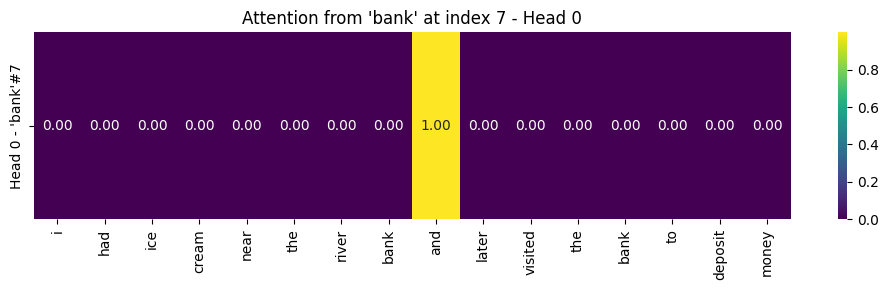

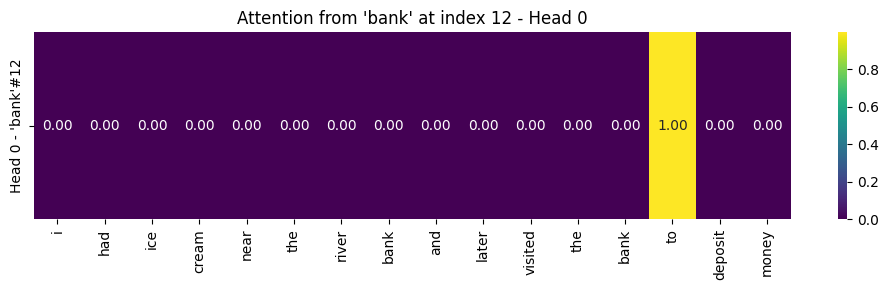

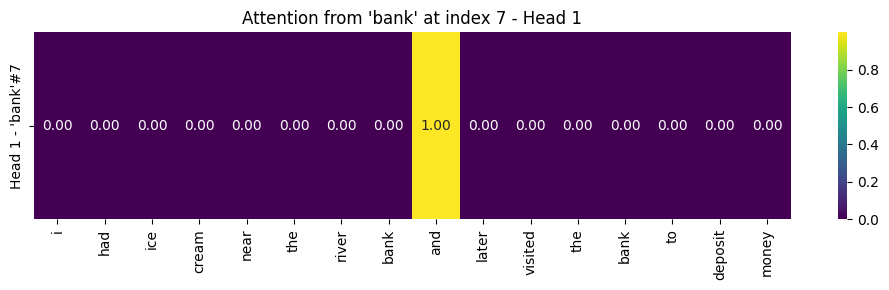

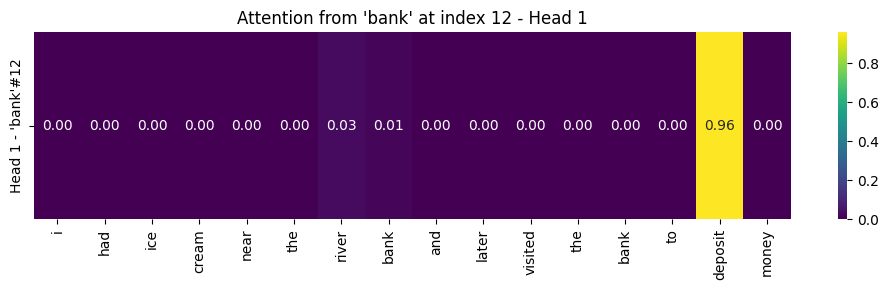

<ipython-input-10-cdfce52c0b2a>:187: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


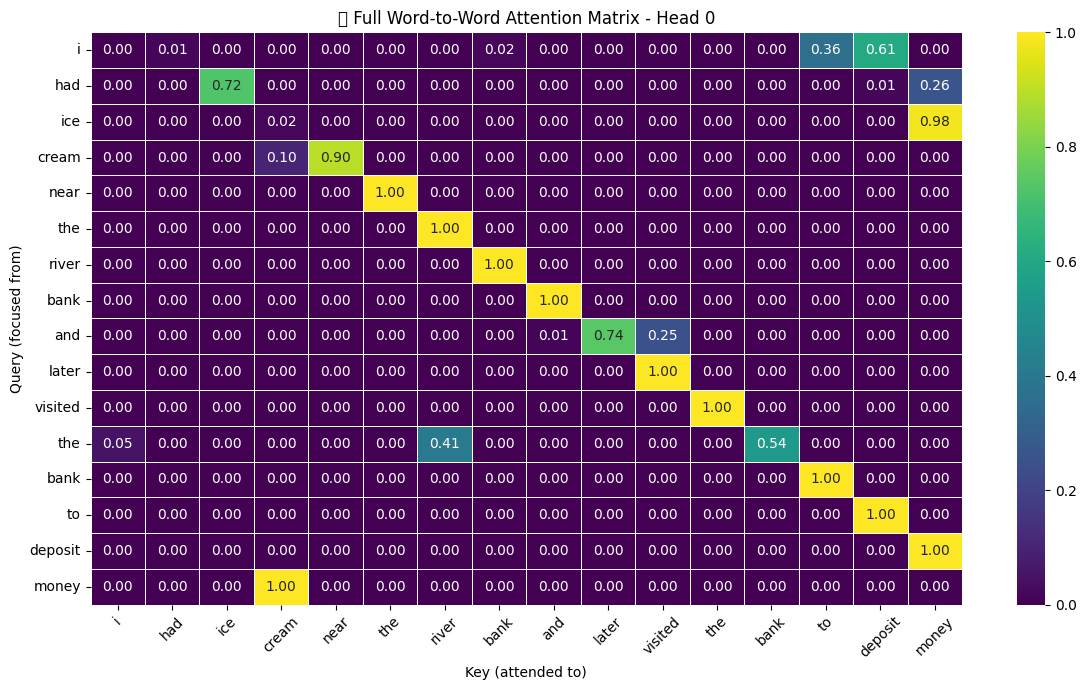

<ipython-input-10-cdfce52c0b2a>:187: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


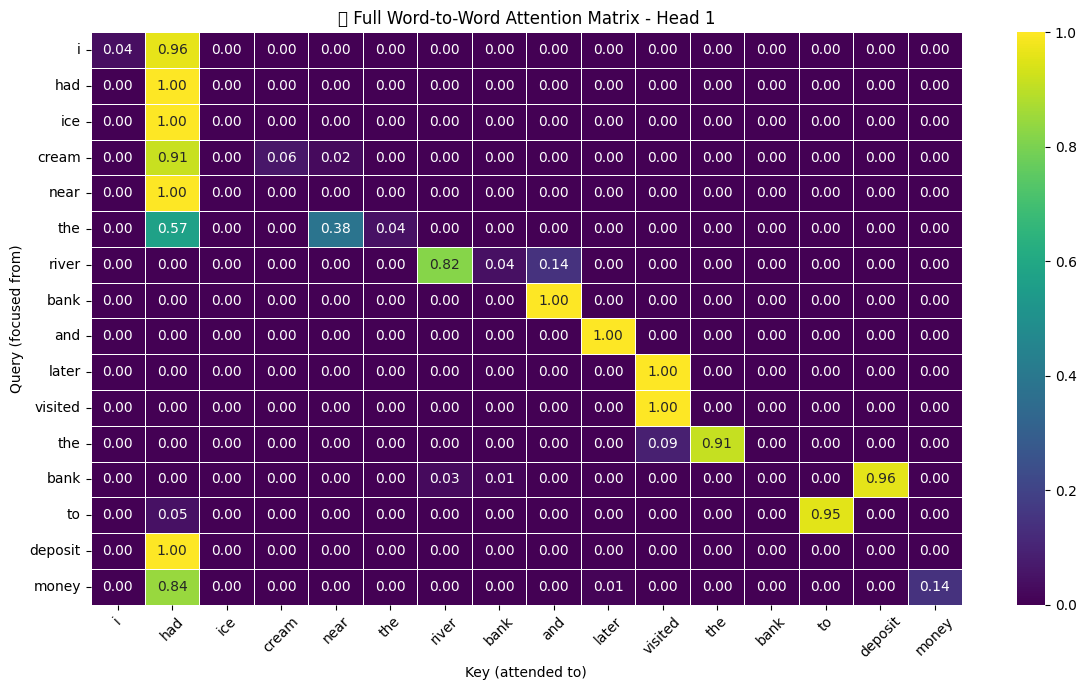

In [10]:
# === Updated RoPE Transformer with Proper Head Splitting ===
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Rotary utils for Q/K projections
class RotaryEmbedding:
    def __init__(self, dim):
        inv_freq = 1.0 / (10000 ** (torch.arange(0, dim, 2).float() / dim))
        self.inv_freq = inv_freq

    def get_embed(self, seq_len, device):
        t = torch.arange(seq_len, device=device).type_as(self.inv_freq)
        freqs = torch.einsum("i , j -> i j", t, self.inv_freq)
        emb = torch.cat((freqs, freqs), dim=-1)
        return emb

def apply_rotary(q, k, rope):
    sin, cos = rope
    q1, k1 = (q * cos) + (rotate_half(q) * sin), (k * cos) + (rotate_half(k) * sin)
    return q1, k1

def rotate_half(x):
    x1 = x[..., ::2]
    x2 = x[..., 1::2]
    return torch.cat((-x2, x1), dim=-1)

# Tokenizer
# === 1. Enhanced Disambiguation Corpus ===
corpus = [
    # River bank
    "I sat near the river bank and watched the ducks",
    "They walked beside the river bank on a sunny day",
    "We had lunch next to the river bank",
    "She painted the view from the river bank",
    "The boat was tied at the river bank",

    # Money bank
    "I went to the bank and deposited cash",
    "She withdrew money from the bank yesterday",
    "They opened a new account at the bank",
    "The bank approved my home loan",
    "He paid the bill at the bank counter",

    # Dual-context sentences
    "I sat near the river bank and later visited the bank to deposit money",
    "They walked by the river bank and then went to the bank to withdraw cash",
    "We had lunch beside the river bank and paid the bill at the bank",
    "The boat was docked at the river bank before we visited the bank",
    "She painted the river bank and applied for a loan at the bank",
] * 30  # Repeat for stronger learning

tokens = sorted(set(" ".join(corpus).lower().split()))
word2idx = {w: i for i, w in enumerate(tokens)}
idx2word = {i: w for w, i in word2idx.items()}
word2idx["<UNK>"] = len(word2idx)
idx2word[len(idx2word)] = "<UNK>"

def tokenize(sentence):
    return [word2idx.get(w, word2idx["<UNK>"]) for w in sentence.lower().split()]

# Rotary-enabled Attention
class RotaryAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.q_proj = nn.Linear(embed_dim, embed_dim)
        self.k_proj = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)
        self.rotary = RotaryEmbedding(self.head_dim)
        self.attn_weights = None

    def forward(self, x):
        B, T, C = x.shape
        q = self.q_proj(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)  # (B, H, T, D)
        k = self.k_proj(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        v = self.v_proj(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)

        rotary_emb = self.rotary.get_embed(T, x.device)
        sin, cos = rotary_emb.sin(), rotary_emb.cos()
        sin = sin.unsqueeze(0).unsqueeze(0)
        cos = cos.unsqueeze(0).unsqueeze(0)

        q, k = apply_rotary(q, k, (sin, cos))

        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.head_dim)  # (B, H, T, T)
        attn = torch.softmax(scores, dim=-1)
        self.attn_weights = attn

        out = torch.matmul(attn, v)  # (B, H, T, D)
        out = out.transpose(1, 2).contiguous().view(B, T, C)
        return self.out_proj(out)

# Transformer with RoPE
class TransformerWithRoPE(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.attn1 = RotaryAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn2 = RotaryAttention(embed_dim, num_heads)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        x = self.embed(x)
        x = self.attn1(x)
        x = self.norm1(x)
        x = self.attn2(x)
        x = self.norm2(x)
        return self.fc(x)

# Train config
vocab_size = len(word2idx)
embedding_dim = 64
num_heads = 2
model = TransformerWithRoPE(vocab_size, embedding_dim, num_heads)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training
for epoch in range(200):
    total_loss = 0
    for sentence in corpus:
        tokens_ = tokenize(sentence)
        if len(tokens_) < 2: continue
        input_ids = torch.tensor(tokens_[:-1]).unsqueeze(0)
        target_ids = torch.tensor(tokens_[1:]).unsqueeze(0)
        output = model(input_ids)
        loss = loss_fn(output.view(-1, vocab_size), target_ids.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# Test Sentence
test_sentence = "I had ice cream near the river bank and later visited the bank to deposit money"
tokens_test = test_sentence.lower().split()
test_ids = tokenize(test_sentence)
input_ids = torch.tensor(test_ids).unsqueeze(0)
_ = model(input_ids)
attn_weights = model.attn2.attn_weights  # shape: (B, H, T, T)

print("attn_weights shape:", attn_weights.shape)
bank_indices = [i for i, t in enumerate(tokens_test) if t == "bank"]

# Print attention scores
for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        print(f"\n🧠 Head {head} attention from 'bank' at index {idx}:")
        attn_vector = attn_weights[0, head, idx, :]
        context_scores = list(zip(tokens_test, attn_vector.detach().numpy()))
        context_scores.sort(key=lambda x: x[1], reverse=True)
        for token, score in context_scores[:5]:
            print(f"  {token:>12} : {score:.4f}")

# Heatmaps from 'bank'
for head in range(attn_weights.shape[1]):
    for idx in bank_indices:
        plt.figure(figsize=(10, 3))
        sns.heatmap(attn_weights[0, head, idx].detach().numpy().reshape(1, -1),
                    xticklabels=tokens_test,
                    yticklabels=[f"Head {head} - 'bank'#{idx}"],
                    cmap="viridis", annot=True, fmt=".2f")
        plt.title(f"Attention from 'bank' at index {idx} - Head {head}")
        plt.tight_layout()
        plt.show()

# Full attention matrices
for head in range(attn_weights.shape[1]):
    plt.figure(figsize=(12, 7))
    sns.heatmap(attn_weights[0, head].detach().numpy(),
                xticklabels=tokens_test,
                yticklabels=tokens_test,
                cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f"🧠 Full Word-to-Word Attention Matrix - Head {head}")
    plt.xlabel("Key (attended to)")
    plt.ylabel("Query (focused from)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [1]:
#Rotary Position Embedding

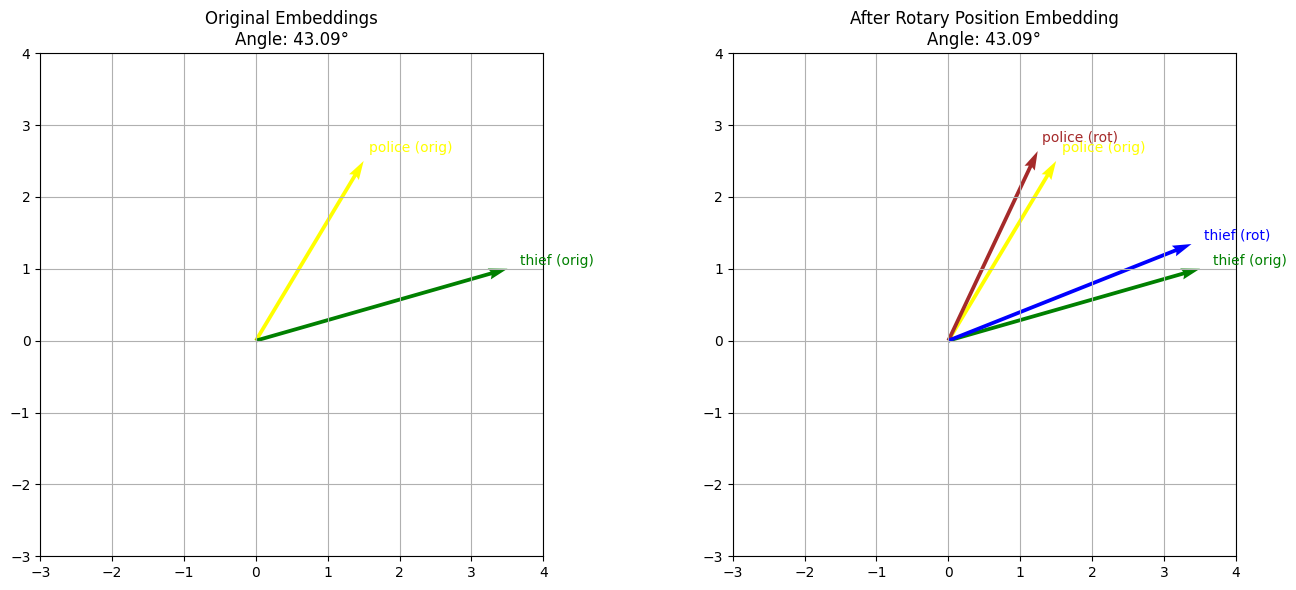

In [11]:
# === Demonstrating Relative Rotation in Rotary Positional Embedding ===
import numpy as np
import matplotlib.pyplot as plt
import math

# Define base word embeddings (2D vectors)
word_embeddings = {
    'police': np.array([1.5, 2.5]),
    'thief': np.array([3.5, 1.0])
}

# Sentences
sentence1 = "The police chased the thief"
sentence2 = "Once upon a time, in New York city the police chased the thief"

# Tokenize and find positions
tokens1 = sentence1.lower().split()
tokens2 = sentence2.lower().split()

police_pos1 = tokens1.index("police")
thief_pos1 = tokens1.index("thief")

# Use same relative offset (rotate by same angle)
relative_offset = 3  # distance between 'police' and 'thief'
rotation_angle = police_pos1 / 10.0  # arbitrary rotation angle based on police position

# Define rotary function
def rotate(vec, angle):
    rot_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle),  np.cos(angle)]
    ])
    return rot_matrix @ vec

def angle_between(v1, v2):
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

# Initial embeddings
police_vec = word_embeddings['police']
thief_vec = word_embeddings['thief']

# Rotate both vectors by same angle
police_rot = rotate(police_vec, rotation_angle)
thief_rot = rotate(thief_vec, rotation_angle)

# Calculate angles
angle_orig = angle_between(police_vec, thief_vec)
angle_rot = angle_between(police_rot, thief_rot)

# --- Plot Before Rotation ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.quiver(0, 0, police_vec[0], police_vec[1], angles='xy', scale_units='xy', scale=1, color='yellow')
plt.text(police_vec[0]*1.05, police_vec[1]*1.05, 'police (orig)', color='yellow')
plt.quiver(0, 0, thief_vec[0], thief_vec[1], angles='xy', scale_units='xy', scale=1, color='green')
plt.text(thief_vec[0]*1.05, thief_vec[1]*1.05, 'thief (orig)', color='green')
plt.title(f"Original Embeddings\nAngle: {angle_orig:.2f}°")
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# --- Plot After Rotation ---
plt.subplot(1, 2, 2)
plt.quiver(0, 0, police_vec[0], police_vec[1], angles='xy', scale_units='xy', scale=1, color='yellow')
plt.text(police_vec[0]*1.05, police_vec[1]*1.05, 'police (orig)', color='yellow')
plt.quiver(0, 0, thief_vec[0], thief_vec[1], angles='xy', scale_units='xy', scale=1, color='green')
plt.text(thief_vec[0]*1.05, thief_vec[1]*1.05, 'thief (orig)', color='green')

plt.quiver(0, 0, police_rot[0], police_rot[1], angles='xy', scale_units='xy', scale=1, color='brown')
plt.text(police_rot[0]*1.05, police_rot[1]*1.05, 'police (rot)', color='brown')
plt.quiver(0, 0, thief_rot[0], thief_rot[1], angles='xy', scale_units='xy', scale=1, color='blue')
plt.text(thief_rot[0]*1.05, thief_rot[1]*1.05, 'thief (rot)', color='blue')

plt.title(f"After Rotary Position Embedding\nAngle: {angle_rot:.2f}°")
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


① Input: [[1. 2. 3. 4.]]
② After fc1: [[-1.0377723   2.672676   -1.1720481   0.60531414]]
③ After ReLU: [[0.         2.672676   0.         0.60531414]]
④ After fc2: [[-0.5218308 -0.7381723  1.0334384  1.3747826]]
⑤ After Add (Residual): [[0.4781692 1.2618277 4.0334387 5.3747826]]
⑥ After LayerNorm: [[-1.1578082 -0.7648366  0.6250088  1.2976359]]
⑦ After Final Linear: [[ 0.0389103  -0.976932   -0.20872864]]
⑧ Output Probabilities (Softmax): [[0.4666924  0.16898806 0.36431956]]


<ipython-input-1-c0b39818ae0b>:88: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


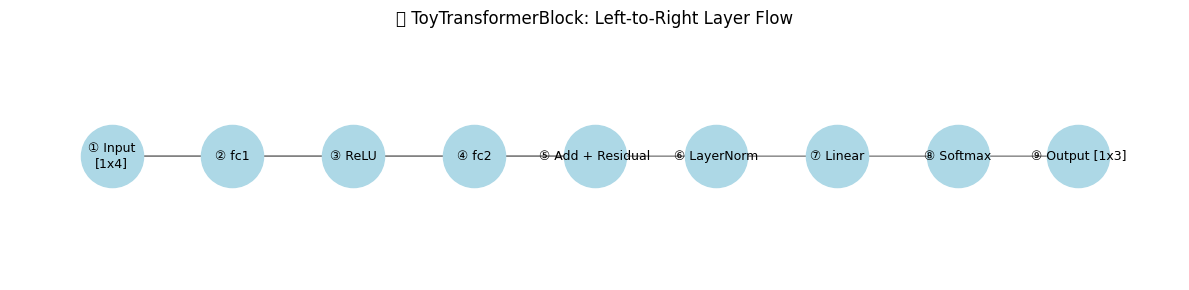

In [1]:
# Residual Neural Network

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import networkx as nx

# Dummy input vector
x = torch.tensor([[1.0, 2.0, 3.0, 4.0]])

class ToyTransformerBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.fc2 = nn.Linear(dim, dim)
        self.norm = nn.LayerNorm(dim)
        self.final = nn.Linear(dim, 3)

    def forward(self, x):
        print("① Input:", x.detach().numpy())
        residual = x

        out = self.fc1(x)
        print("② After fc1:", out.detach().numpy())
        out = F.relu(out)
        print("③ After ReLU:", out.detach().numpy())

        out = self.fc2(out)
        print("④ After fc2:", out.detach().numpy())

        added = out + residual
        print("⑤ After Add (Residual):", added.detach().numpy())

        out = self.norm(added)
        print("⑥ After LayerNorm:", out.detach().numpy())

        out = self.final(out)
        print("⑦ After Final Linear:", out.detach().numpy())

        out = F.softmax(out, dim=-1)
        print("⑧ Output Probabilities (Softmax):", out.detach().numpy())
        return out

model = ToyTransformerBlock(dim=4)
out = model(x)

# === Network Visualization ===
G = nx.DiGraph()
nodes = [
    ("Input", "① Input\n[1x4]"),
    ("FC1", "② fc1"),
    ("ReLU", "③ ReLU"),
    ("FC2", "④ fc2"),
    ("Add", "⑤ Add + Residual"),
    ("Norm", "⑥ LayerNorm"),
    ("Final", "⑦ Linear"),
    ("Softmax", "⑧ Softmax"),
    ("Output", "⑨ Output [1x3]")
]

for node, label in nodes:
    G.add_node(node, label=label)

edges = [
    ("Input", "FC1"),
    ("FC1", "ReLU"),
    ("ReLU", "FC2"),
    ("FC2", "Add"),
    ("Input", "Add"),
    ("Add", "Norm"),
    ("Norm", "Final"),
    ("Final", "Softmax"),
    ("Softmax", "Output")
]

G.add_edges_from(edges)

# Layout: horizontal alignment
pos = {node[0]: (i, 0) for i, node in enumerate(nodes)}
labels = nx.get_node_attributes(G, 'label')

plt.figure(figsize=(12, 3))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=15, edge_color='gray')

plt.axis('off')
plt.title("🚀 ToyTransformerBlock: Left-to-Right Layer Flow", fontsize=12)
plt.tight_layout()
plt.show()


In [20]:
# === Mini Transformer for English to French Translation ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Force device to CPU
device = torch.device("cpu")

# === 1. Toy Parallel Corpus ===
parallel_data = [
    ("i like ice cream", "j'aime la glace"),
    ("i love chocolate", "j'adore le chocolat"),
    ("she eats ice cream", "elle mange de la glace"),
]

# === 2. Tokenizer & Vocabulary ===
def build_vocab(sentences):
    tokens = set()
    for sent in sentences:
        tokens.update(sent.lower().split())
    vocab = {word: i+4 for i, word in enumerate(sorted(tokens))}
    vocab['<pad>'] = 0
    vocab['<sos>'] = 1
    vocab['<eos>'] = 2
    vocab['<unk>'] = 3
    return vocab

def encode(sentence, vocab):
    return [vocab.get(w, vocab['<unk>']) for w in sentence.lower().split()] + [vocab['<eos>']]

def decode(indices, vocab):
    inv = {i: w for w, i in vocab.items()}
    return ' '.join([inv.get(idx, '<unk>') for idx in indices if idx != vocab['<eos>'] and idx != vocab['<pad>']])

src_sentences = [s[0] for s in parallel_data]
tgt_sentences = [s[1] for s in parallel_data]

src_vocab = build_vocab(src_sentences)
tgt_vocab = build_vocab(tgt_sentences)

src_pad_idx = src_vocab['<pad>']
tgt_pad_idx = tgt_vocab['<pad>']

# === 3. Positional Encoding ===
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=50):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)].to(x.device)

# === 4. Transformer Model ===
class MiniTransformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model=64, nhead=2):
        super().__init__()
        self.src_embed = nn.Embedding(src_vocab_size, d_model)
        self.tgt_embed = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_enc = PositionalEncoding(d_model)

        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model, nhead), num_layers=2)
        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model, nhead), num_layers=2)

        self.out = nn.Linear(d_model, tgt_vocab_size)

    def forward(self, src, tgt):
        src_key_padding_mask = (src == src_pad_idx)
        tgt_mask = self._generate_square_subsequent_mask(tgt.size(1)).to(tgt.device)

        src_embed = self.pos_enc(self.src_embed(src))
        tgt_embed = self.pos_enc(self.tgt_embed(tgt))

        memory = self.encoder(src_embed.transpose(0, 1), src_key_padding_mask=src_key_padding_mask)
        out = self.decoder(tgt_embed.transpose(0, 1), memory, tgt_mask=tgt_mask)
        return self.out(out.transpose(0, 1))

    def _generate_square_subsequent_mask(self, sz):
        mask = torch.triu(torch.ones(sz, sz) * float('-inf'), diagonal=1)
        return mask

# === 5. Training Setup ===
d_model = 64
model = MiniTransformer(len(src_vocab), len(tgt_vocab), d_model=d_model).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss(ignore_index=tgt_pad_idx)

def pad_sequence(seq, max_len, pad_idx):
    return seq + [pad_idx] * (max_len - len(seq))

# Prepare padded tensors
src_batch = [encode(src, src_vocab) for src in src_sentences]
tgt_batch = [encode(tgt, tgt_vocab) for tgt in tgt_sentences]
max_src = max(len(s) for s in src_batch)
max_tgt = max(len(t) for t in tgt_batch)

src_tensor = torch.tensor([pad_sequence(s, max_src, src_pad_idx) for s in src_batch]).to(device)
tgt_tensor = torch.tensor([pad_sequence(t, max_tgt, tgt_pad_idx) for t in tgt_batch]).to(device)

# Training loop
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = model(src_tensor, tgt_tensor[:, :-1])
    loss = criterion(output.reshape(-1, output.size(-1)), tgt_tensor[:, 1:].reshape(-1))
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# === 6. Inference ===
def greedy_decode(model, src_sentence, max_len=10):
    model.eval()
    src = torch.tensor([pad_sequence(encode(src_sentence, src_vocab), max_src, src_pad_idx)]).to(device)
    src_mask = None
    src_embed = model.pos_enc(model.src_embed(src)).transpose(0, 1)
    memory = model.encoder(src_embed, src_key_padding_mask=(src == src_pad_idx))
    tgt = torch.tensor([[tgt_vocab['<sos>']]]).to(device)

    for _ in range(max_len):
        tgt_embed = model.pos_enc(model.tgt_embed(tgt)).transpose(0, 1)
        tgt_mask = model._generate_square_subsequent_mask(tgt.size(1)).to(device)
        out = model.decoder(tgt_embed, memory, tgt_mask=tgt_mask)
        prob = model.out(out[-1])
        next_word = prob.argmax(-1).unsqueeze(0)
        tgt = torch.cat([tgt, next_word], dim=1)
        if next_word.item() == tgt_vocab['<eos>']:
            break
    return decode(tgt[0].tolist()[1:], tgt_vocab)

# === 7. Translate Test Sentence ===
test_sentence = "i like ice cream"
translation = greedy_decode(model, test_sentence)
print(f"English: {test_sentence}\nFrench: {translation}")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0, Loss: 2.9761
Epoch 20, Loss: 0.0594
Epoch 40, Loss: 0.0035
Epoch 60, Loss: 0.0012
Epoch 80, Loss: 0.0008
English: i like ice cream
French: le chocolat


In [22]:
# === Mini Transformer for English to French Translation ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Force device to CPU
device = torch.device("cpu")

# === 1. Toy Parallel Corpus ===
parallel_data = [
    ("i like ice cream", "j'aime la glace"),
    ("i love chocolate", "j'adore le chocolat"),
    ("i like ice cream", "j'aime la glace"),
]

# === 2. Tokenizer & Vocabulary ===
def build_vocab(sentences):
    tokens = set()
    for sent in sentences:
        tokens.update(sent.lower().split())
    vocab = {word: i+4 for i, word in enumerate(sorted(tokens))}
    vocab['<pad>'] = 0
    vocab['<sos>'] = 1
    vocab['<eos>'] = 2
    vocab['<unk>'] = 3
    return vocab

def encode(sentence, vocab):
    return [vocab.get(w, vocab['<unk>']) for w in sentence.lower().split()] + [vocab['<eos>']]

def encode_with_sos(sentence, vocab):
    return [vocab['<sos>']] + [vocab.get(w, vocab['<unk>']) for w in sentence.lower().split()] + [vocab['<eos>']]

def decode(indices, vocab):
    inv = {i: w for w, i in vocab.items()}
    return ' '.join([inv.get(idx, '<unk>') for idx in indices if idx != vocab['<eos>'] and idx != vocab['<pad>']])

src_sentences = [s[0] for s in parallel_data]
tgt_sentences = [s[1] for s in parallel_data]

src_vocab = build_vocab(src_sentences)
tgt_vocab = build_vocab(tgt_sentences)

src_pad_idx = src_vocab['<pad>']
tgt_pad_idx = tgt_vocab['<pad>']

# === 3. Positional Encoding ===
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=50):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)].to(x.device)

# === 4. Transformer Model ===
class MiniTransformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model=64, nhead=2):
        super().__init__()
        self.src_embed = nn.Embedding(src_vocab_size, d_model)
        self.tgt_embed = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_enc = PositionalEncoding(d_model)

        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model, nhead), num_layers=2)
        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model, nhead), num_layers=2)

        self.out = nn.Linear(d_model, tgt_vocab_size)

    def forward(self, src, tgt):
        src_key_padding_mask = (src == src_pad_idx)
        tgt_mask = self._generate_square_subsequent_mask(tgt.size(1)).to(tgt.device)

        src_embed = self.pos_enc(self.src_embed(src))
        tgt_embed = self.pos_enc(self.tgt_embed(tgt))

        memory = self.encoder(src_embed.transpose(0, 1), src_key_padding_mask=src_key_padding_mask)
        out = self.decoder(tgt_embed.transpose(0, 1), memory, tgt_mask=tgt_mask)
        return self.out(out.transpose(0, 1))

    def _generate_square_subsequent_mask(self, sz):
        mask = torch.triu(torch.ones(sz, sz) * float('-inf'), diagonal=1)
        return mask

# === 5. Training Setup ===
d_model = 64
model = MiniTransformer(len(src_vocab), len(tgt_vocab), d_model=d_model).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss(ignore_index=tgt_pad_idx)

def pad_sequence(seq, max_len, pad_idx):
    return seq + [pad_idx] * (max_len - len(seq))

# Prepare padded tensors
src_batch = [encode(src, src_vocab) for src in src_sentences]
tgt_batch = [encode_with_sos(tgt, tgt_vocab) for tgt in tgt_sentences]
max_src = max(len(s) for s in src_batch)
max_tgt = max(len(t) for t in tgt_batch)

src_tensor = torch.tensor([pad_sequence(s, max_src, src_pad_idx) for s in src_batch]).to(device)
tgt_tensor = torch.tensor([pad_sequence(t, max_tgt, tgt_pad_idx) for t in tgt_batch]).to(device)

# Training loop
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = model(src_tensor, tgt_tensor[:, :-1])
    loss = criterion(output.reshape(-1, output.size(-1)), tgt_tensor[:, 1:].reshape(-1))
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# === 6. Inference ===
def greedy_decode(model, src_sentence, max_len=10):
    model.eval()
    src = torch.tensor([pad_sequence(encode(src_sentence, src_vocab), max_src, src_pad_idx)]).to(device)
    src_mask = None
    src_embed = model.pos_enc(model.src_embed(src)).transpose(0, 1)
    memory = model.encoder(src_embed, src_key_padding_mask=(src == src_pad_idx))
    tgt = torch.tensor([[tgt_vocab['<sos>']]]).to(device)

    for _ in range(max_len):
        tgt_embed = model.pos_enc(model.tgt_embed(tgt)).transpose(0, 1)
        tgt_mask = model._generate_square_subsequent_mask(tgt.size(1)).to(device)
        out = model.decoder(tgt_embed, memory, tgt_mask=tgt_mask)
        prob = model.out(out[-1])
        next_word = prob.argmax(-1).unsqueeze(0)
        tgt = torch.cat([tgt, next_word], dim=1)
        if next_word.item() == tgt_vocab['<eos>']:
            break
    return decode(tgt[0].tolist()[1:], tgt_vocab)

# === 7. Translate Test Sentence ===
test_sentence = "i like ice cream"
translation = greedy_decode(model, test_sentence)
print(f"English: {test_sentence}\nFrench: {translation}")

Epoch 0, Loss: 2.5604
Epoch 20, Loss: 0.2112
Epoch 40, Loss: 0.2724
Epoch 60, Loss: 0.2112
Epoch 80, Loss: 1.4941
English: i like ice cream
French: j'aime la glace


In [24]:
src_vocab

{'chocolate': 4,
 'cream': 5,
 'i': 6,
 'ice': 7,
 'like': 8,
 'love': 9,
 '<pad>': 0,
 '<sos>': 1,
 '<eos>': 2,
 '<unk>': 3}